In [1]:
!pip install scikit-learn
!pip install openpyxl

In [2]:
!pip install -U imbalanced-learn

lOADING DATA : Initial Dataset

In [4]:
import os
import pandas as pd
import numpy as np
import warnings
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
# loading the datatset from the location
initial_dataset = pd.read_excel('Road Accident Data_new_new.xlsx')
initial_dataset.tail()


Accident_Index Accident Date Day_of_Week              Junction_Control  \
307968  201091NM01760    2022-02-18    Thursday  Data missing or out of range   
307969  201091NM01881    2022-02-21      Sunday  Data missing or out of range   
307970  201091NM01935    2022-02-23     Tuesday      Give way or uncontrolled   
307971  201091NM01964    2022-02-23     Tuesday      Give way or uncontrolled   
307972  201091NM02142    2022-02-28      Sunday      Give way or uncontrolled   

                            Junction_Detail Accident_Severity   Latitude  \
307968  Not at junction or within 20 metres            Slight  57.374005   
307969  Not at junction or within 20 metres            Slight  57.232273   
307970              T or staggered junction            Slight  57.585044   
307971              T or staggered junction           Serious  57.214898   
307972              T or staggered junction           Serious  57.575210   

              Light_Conditions Local_Authority_(District)  \
307968                Daylight                   Highland   
307969  Darkness - no lighting                   Highland   
307970                Daylight                   Highland   
307971  Darkness - no lighting                   Highland   
307972                Daylight                   Highland   

         Carriageway_Hazards  ...  Number_of_Casualties  Number_of_Vehicles  \
307968                   NaN  ...                     2                   1   
307969                   NaN  ...                     1                   1   
307970                   NaN  ...                     1                   3   
307971                   NaN  ...                     1                   2   
307972  Other object on road  ...                     1                   1   

        Police_Force Road_Surface_Conditions           Road_Type Speed_limit  \
307968      Northern                     Dry  Single carriageway          60   
307969      Northern            Frost or ice  Single carriageway          60   
307970      Northern            Frost or ice  Single carriageway          30   
307971      Northern             Wet or damp  Single carriageway          60   
307972      Northern             Wet or damp    Dual carriageway          60   

            Time Urban_or_Rural_Area     Weather_Conditions  \
307968  07:00:00               Rural     Fine no high winds   
307969  03:00:00               Rural     Fine no high winds   
307970  09:38:00               Rural     Fine no high winds   
307971  18:25:00               Rural     Fine no high winds   
307972  15:45:00               Rural  Snowing no high winds   

                 Vehicle_Type  
307968                    Car  
307969                    Car  
307970                    Car  
307971  Motorcycle over 500cc  
307972                    Car  

[5 rows x 21 columns]

DESCRIPTION OF THE DATASET

In [5]:
initial_dataset.describe()

Accident Date       Latitude      Longitude  \
count                         307973  307973.000000  307973.000000   
mean   2021-12-23 22:19:39.804722944      52.487005      -1.368884   
min              2021-01-01 00:00:00      49.914488      -7.516225   
25%              2021-06-28 00:00:00      51.485248      -2.247937   
50%              2021-12-08 00:00:00      52.225943      -1.349258   
75%              2022-06-25 00:00:00      53.415517      -0.206810   
max              2022-12-31 00:00:00      60.598055       1.759398   
std                              NaN       1.339011       1.356092   

       Number_of_Casualties  Number_of_Vehicles    Speed_limit  
count         307973.000000       307973.000000  307973.000000  
mean               1.356882            1.829063      38.866037  
min                1.000000            1.000000      10.000000  
25%                1.000000            1.000000      30.000000  
50%                1.000000            2.000000      30.000000  
75%                1.000000            2.000000      50.000000  
max               48.000000           32.000000      70.000000  
std                0.815857            0.710477      14.032933

SHAPE OF THE INITIAL DATASET

In [6]:
# Assuming initial_dataset is your DataFrame
dataset_shape = initial_dataset.shape

# Print the shape
print("Shape of the dataset:", dataset_shape)

Shape of the dataset: (307973, 21)


NULL IN THE INITIAL DATASET

In [7]:
initial_dataset.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

CONVERTING NULL VALUES USING THE MOST FREQUENT VALUES

In [8]:
for column in initial_dataset.columns:
    most_frequent_value = initial_dataset[column].mode()[0]
    initial_dataset[column].fillna(most_frequent_value, inplace=True)
initial_dataset.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Carriageway_Hazards           0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

FINDING THE DUPLICATE ROWS

In [9]:
import pandas as pd

# Finding duplicate rows (considering all columns)
duplicate_rows = initial_dataset[initial_dataset.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows in a tabular form
from IPython.display import display  # Only needed in Jupyter Notebooks or similar environments
display(duplicate_rows)


Number of duplicate rows: 1


Accident_Index Accident Date Day_of_Week              Junction_Control  \
50483  2010000000000    2021-01-06     Tuesday  Data missing or out of range   

                           Junction_Detail Accident_Severity   Latitude  \
50483  Not at junction or within 20 metres            Slight  53.648498   

      Light_Conditions Local_Authority_(District)   Carriageway_Hazards  ...  \
50483         Daylight                 Calderdale  Other object on road  ...   

       Number_of_Casualties  Number_of_Vehicles    Police_Force  \
50483                     1                   1  West Yorkshire   

      Road_Surface_Conditions           Road_Type Speed_limit      Time  \
50483            Frost or ice  Single carriageway          50  16:35:00   

      Urban_or_Rural_Area  Weather_Conditions Vehicle_Type  
50483               Rural  Fine no high winds          Car  

[1 rows x 21 columns]

DROPPING THE DUPLICATE ROW

In [10]:
initial_dataset.drop_duplicates(inplace=True, keep='first')

# Check the shape of the DataFrame after removing duplicates
print(f"Shape of dataset after removing duplicates: {initial_dataset.shape}")

Shape of dataset after removing duplicates: (307972, 21)


COPYING THE INITIAL DATASET INTO TRANSFORMED DATASET

In [11]:
transformed_dataset=initial_dataset.copy()
features_to_drop = ['Accident_Index', 'Accident Date', 'Latitude', 'Longitude', 'Local_Authority_(District)', 'Police_Force','Time']
transformed_dataset.drop(features_to_drop, axis=1, inplace=True)

FINDING THE UNIQUE VALUES IN THE TRANSFORMED DATASET

In [12]:
# Assuming initial_dataset is your DataFrame
selected_features = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity',
                      'Light_Conditions',  'Carriageway_Hazards',
                      'Number_of_Casualties', 'Number_of_Vehicles',  'Road_Surface_Conditions',
                      'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']

for feature in selected_features:
    unique_values = transformed_dataset[feature].unique()
    print(f"Unique values for {feature}:\n{unique_values}\n")

Unique values for Day_of_Week:
['Thursday' 'Monday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Saturday']

Unique values for Junction_Control:
['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']

Unique values for Junction_Detail:
['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'Roundabout' 'Mini-roundabout'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Slip road' 'Other junction']

Unique values for Accident_Severity:
['Serious' 'Slight' 'Fetal' 'Fatal']

Unique values for Light_Conditions:
['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']

Unique values for Carriageway_Hazards:
['Other object on road' 'Pedestrian in carriageway - not injured'
 'Any animal in carriageway (except ridden horse)' 'Previous accident'
 'Vehicle load on road']

Unique va

ASSIGNING THE VALUES TO THE UNIQUE VALUES BY ONE-HOT ENCODING

In [13]:
day_of_week_mapping = {'Thursday': 0, 'Monday': 1, 'Sunday': 2, 'Tuesday': 3, 'Friday': 4, 'Wednesday': 5, 'Saturday': 6}
junction_control_mapping = {'Give way or uncontrolled': 0, 'Auto traffic signal': 1, 'Data missing or out of range': 2,
                            'Authorised person': 3, 'Stop sign': 4, 'Not at junction or within 20 metres': 5,
                            'Auto traffic sigl': 6}
junction_detail_mapping = {'T or staggered junction': 0, 'Crossroads': 1,
                            'Not at junction or within 20 metres': 2, 'Roundabout': 3, 'Mini-roundabout': 4,
                            'More than 4 arms (not roundabout)': 5, 'Private drive or entrance': 6,
                            'Slip road': 7, 'Other junction': 8}
accident_severity_mapping = {'Serious': 0, 'Slight': 1, 'Fetal': 2, 'Fatal': 3}
light_conditions_mapping = {'Daylight': 0, 'Darkness - lights lit': 1, 'Darkness - lighting unknown': 2,
                            'Darkness - lights unlit': 3, 'Darkness - no lighting': 4}
carriageway_hazards_mapping = {'None': 0, 'Pedestrian in carriageway - not injured': 1, 'Other object on road': 2,
                               'Any animal in carriageway (except ridden horse)': 3, 'Previous accident': 4,
                               'Vehicle load on road': 5}
road_surface_conditions_mapping = {'Dry': 0, 'Wet or damp': 1, 'Frost or ice': 2, 'Snow': 3, 'Flood over 3cm. deep': 4}
road_type_mapping = {'One way street': 0, 'Single carriageway': 1, 'Dual carriageway': 2, 'Roundabout': 3, 'Slip road': 4}
urban_rural_area_mapping = {'Urban': 0, 'Rural': 1}
weather_conditions_mapping = {'Fine no high winds': 0, 'Other': 1, 'Raining no high winds': 2,
                               'Snowing no high winds': 3, 'Fine + high winds': 4, 'Raining + high winds': 5,
                               'Snowing + high winds': 6, 'Fog or mist': 7}
vehicle_type_mapping = {'Car': 0, 'Taxi/Private hire car': 1, 'Motorcycle over 500cc': 2,
                        'Van / Goods 3.5 tonnes mgw or under': 3, 'Goods over 3.5t. and under 7.5t': 4,
                        'Motorcycle 125cc and under': 5, 'Motorcycle 50cc and under': 6,
                        'Bus or coach (17 or more pass seats)': 7, 'Goods 7.5 tonnes mgw and over': 8,
                        'Other vehicle': 9, 'Motorcycle over 125cc and up to 500cc': 10,
                        'Agricultural vehicle': 11, 'Minibus (8 - 16 passenger seats)': 12, 'Pedal cycle': 13,
                        'Ridden horse': 14}

# Apply mapping to each respective column
transformed_dataset['Day_of_Week'] = transformed_dataset['Day_of_Week'].map(day_of_week_mapping)
transformed_dataset['Junction_Control'] = transformed_dataset['Junction_Control'].map(junction_control_mapping)
transformed_dataset['Junction_Detail'] = transformed_dataset['Junction_Detail'].map(junction_detail_mapping)
transformed_dataset['Accident_Severity'] = transformed_dataset['Accident_Severity'].map(accident_severity_mapping)
transformed_dataset['Light_Conditions'] = transformed_dataset['Light_Conditions'].map(light_conditions_mapping)
transformed_dataset['Carriageway_Hazards'] = transformed_dataset['Carriageway_Hazards'].map(carriageway_hazards_mapping)
transformed_dataset['Road_Surface_Conditions'] = transformed_dataset['Road_Surface_Conditions'].map(road_surface_conditions_mapping)
transformed_dataset['Road_Type'] = transformed_dataset['Road_Type'].map(road_type_mapping)
transformed_dataset['Urban_or_Rural_Area'] = transformed_dataset['Urban_or_Rural_Area'].map(urban_rural_area_mapping)
transformed_dataset['Weather_Conditions'] = transformed_dataset['Weather_Conditions'].map(weather_conditions_mapping)
transformed_dataset['Vehicle_Type'] = transformed_dataset['Vehicle_Type'].map(vehicle_type_mapping)

# Display the resulting DataFrame
print(transformed_dataset.head())


   Day_of_Week  Junction_Control  Junction_Detail  Accident_Severity  \
0            0                 0                0                  0   
1            1                 0                1                  0   
2            2                 0                0                  1   
3            1                 1                0                  0   
4            3                 1                1                  0   

   Light_Conditions  Carriageway_Hazards  Number_of_Casualties  \
0                 0                    2                     1   
1                 0                    2                    11   
2                 0                    2                     1   
3                 0                    2                     1   
4                 1                    2                     1   

   Number_of_Vehicles  Road_Surface_Conditions  Road_Type  Speed_limit  \
0                   2                        0          0           30   
1                   2 

SHAPE OF THE TRANSFORMED DATASET

In [14]:
transformed_dataset.shape

(307972, 14)

In [15]:
transformed_dataset.isnull().sum()

Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Accident_Severity          0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

UNIQUE VALUES ARE PRINTED AFTER ASSIGNING THEM

In [16]:
# Display unique values for each feature
for column in transformed_dataset.columns:
    unique_values = transformed_dataset[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for Day_of_Week:
[0 1 2 3 4 5 6]

Unique values for Junction_Control:
[0 1 2 3 4 5 6]

Unique values for Junction_Detail:
[0 1 2 3 4 5 6 7 8]

Unique values for Accident_Severity:
[0 1 2 3]

Unique values for Light_Conditions:
[0 1 2 3 4]

Unique values for Carriageway_Hazards:
[2 1 3 4 5]

Unique values for Number_of_Casualties:
[ 1 11  3  2  4  5  6 10  8  7  9 13 12 14 16 18 15 19 21 17 27 48 40 24
 26 22 42 43]

Unique values for Number_of_Vehicles:
[ 2  1  3  4  5  9  6  8  7 10 16 13 14 11 12 32 19]

Unique values for Road_Surface_Conditions:
[0 1 2 3 4]

Unique values for Road_Type:
[0 1 2 3 4]

Unique values for Speed_limit:
[30 20 50 40 70 60 10 15]

Unique values for Urban_or_Rural_Area:
[0 1]

Unique values for Weather_Conditions:
[0 1 2 3 4 5 6 7]

Unique values for Vehicle_Type:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]



COMPARISION FOR INITIAL DATASET AND THE TRANSFORMED DATASET

In [17]:
# Original data types
original_dtypes = initial_dataset.dtypes

# Prepare a comparison DataFrame for all columns
common_columns = set(initial_dataset.columns).intersection(transformed_dataset.columns)
comparison = pd.DataFrame({
    'Column': list(common_columns),
    'Original Data Type': [original_dtypes[col] for col in common_columns],
    'Transformed Data Type': [transformed_dataset[col].dtype for col in common_columns]
})

# Display the comparison DataFrame
comparison

Column Original Data Type Transformed Data Type
0         Accident_Severity             object                 int64
1          Light_Conditions             object                 int64
2                 Road_Type             object                 int64
3      Number_of_Casualties              int64                 int64
4               Speed_limit              int64                 int64
5               Day_of_Week             object                 int64
6       Urban_or_Rural_Area             object                 int64
7        Weather_Conditions             object                 int64
8              Vehicle_Type             object                 int64
9        Number_of_Vehicles              int64                 int64
10         Junction_Control             object                 int64
11  Road_Surface_Conditions             object                 int64
12          Junction_Detail             object                 int64
13      Carriageway_Hazards             object                 int64

TARGET VALUE : ACCIDENT_SEVERITY IS PLOTTED

<Axes: xlabel='Accident_Severity', ylabel='count'>

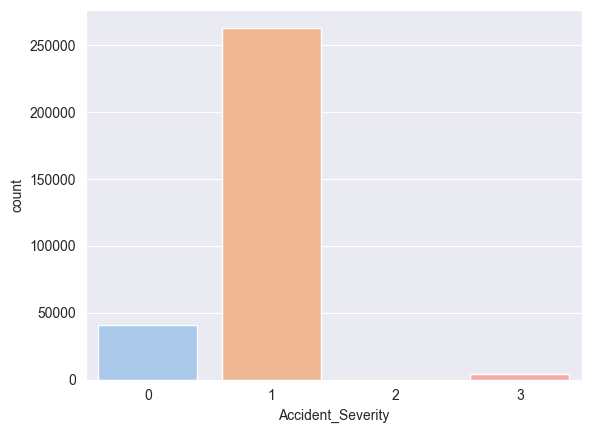

In [18]:
import seaborn as sns
sns.countplot(x='Accident_Severity',data=transformed_dataset,palette="pastel")

In [19]:
target = transformed_dataset['Accident_Severity'].value_counts()
target

Accident_Severity
1    263279
0     40740
3      3904
2        49
Name: count, dtype: int64

EDA : EXPLORATORY DATA ANALYSIS , where X values has the whole transformed dataset , y has the Accident_seveity from transformed dataset

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable 'y' and features 'X'
y = transformed_dataset['Accident_Severity']
X = transformed_dataset.drop('Accident_Severity', axis=1)

# Descriptive statistics for numerical features in X
print("Descriptive Statistics for Numerical Features in X:")
print(X.describe())

Descriptive Statistics for Numerical Features in X:
         Day_of_Week  Junction_Control  Junction_Detail  Light_Conditions  \
count  307972.000000     307972.000000    307972.000000     307972.000000   
mean        3.031373          1.181711         1.797810          0.439907   
std         1.998390          1.467584         1.857133          0.965213   
min         0.000000          0.000000         0.000000          0.000000   
25%         1.000000          0.000000         0.000000          0.000000   
50%         3.000000          1.000000         2.000000          0.000000   
75%         5.000000          2.000000         2.000000          1.000000   
max         6.000000          6.000000         8.000000          4.000000   

       Carriageway_Hazards  Number_of_Casualties  Number_of_Vehicles  \
count        307972.000000         307972.000000       307972.000000   
mean              2.009520              1.356883            1.829066   
std               0.154655            

In [21]:
# Check for null values in X
print("\nNull Values in X:")
print(X.isnull().sum())


Null Values in X:
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64


BOX PLOT FOR OUTLINERS

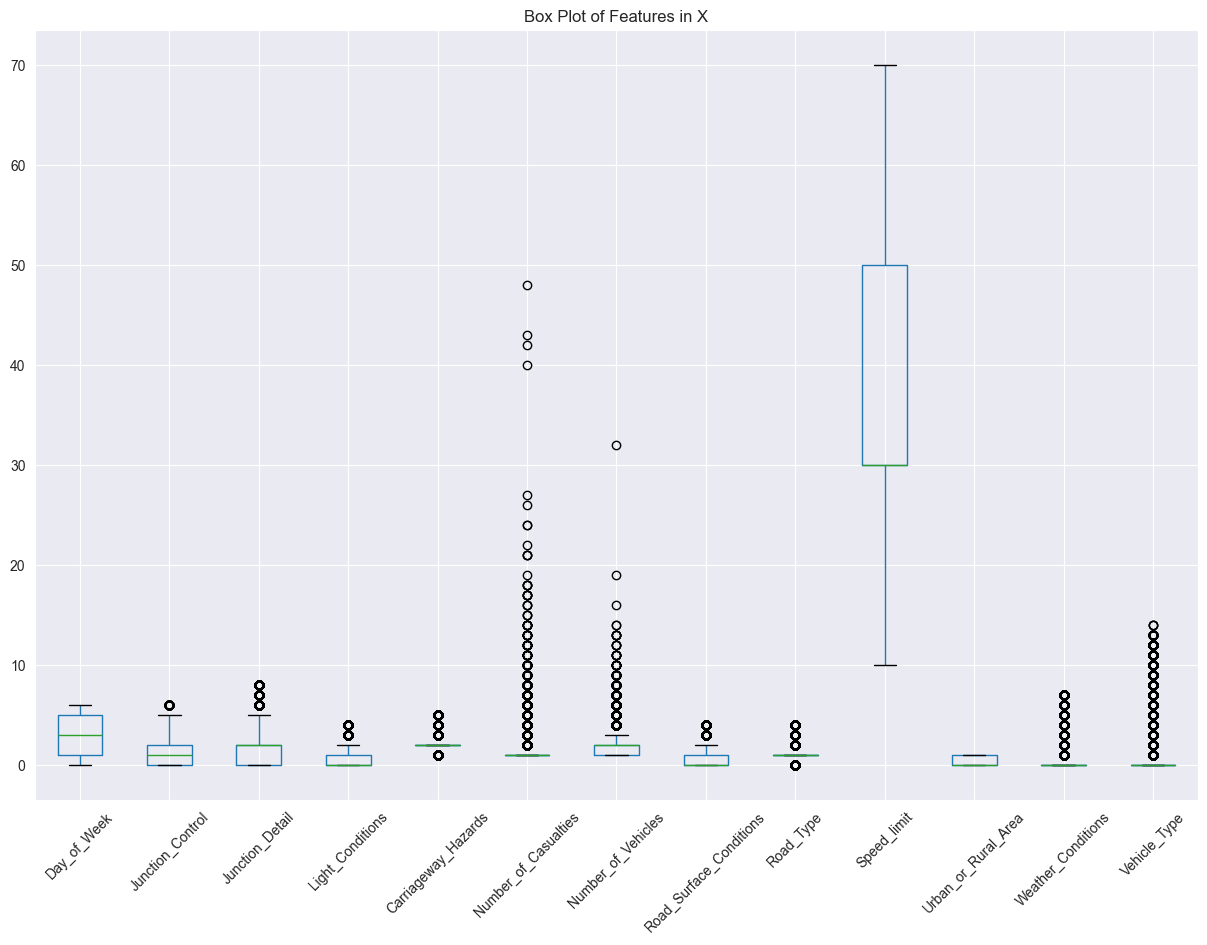

In [22]:
# Visualizing Outliers using Box Plots
plt.figure(figsize=(15, 10))
X.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Features in X')
plt.show()

IQR : INTERQUARTILE RANGE

In [23]:
# Function to detect outliers based on IQR
def detect_outliers(df):
    outlier_indices_iqr = []

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices_iqr.extend(outlier_list_col)

    outlier_indices_iqr = list(set(outlier_indices_iqr))
    return outlier_indices_iqr

# Detect outliers
outliers_iqr = detect_outliers(X)

# Print information about outliers
print(f"Number of Outliers Detected: {len(outliers_iqr)}")
print("Outliers Indices:", outliers_iqr)

Number of Outliers Detected: 208948
Outliers Indices: [0, 1, 2, 3, 5, 6, 7, 8, 9, 12, 13, 16, 20, 21, 22, 23, 24, 25, 30, 32, 36, 38, 39, 40, 42, 43, 44, 45, 46, 51, 54, 55, 56, 57, 59, 62, 63, 66, 67, 69, 70, 71, 72, 74, 75, 80, 81, 84, 85, 87, 88, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 113, 119, 121, 124, 129, 131, 132, 133, 135, 139, 140, 142, 144, 145, 146, 147, 150, 151, 152, 153, 155, 158, 161, 162, 165, 166, 168, 169, 170, 173, 177, 178, 184, 185, 188, 194, 195, 197, 198, 199, 200, 201, 202, 204, 206, 207, 209, 212, 215, 216, 218, 222, 223, 228, 231, 232, 233, 234, 235, 237, 239, 240, 241, 242, 247, 256, 261, 262, 264, 265, 267, 269, 272, 275, 277, 280, 281, 285, 289, 290, 291, 295, 302, 306, 307, 308, 312, 314, 315, 318, 321, 322, 325, 327, 331, 334, 338, 339, 340, 342, 343, 344, 346, 348, 349, 350, 352, 353, 354, 356, 361, 362, 364, 367, 369, 370, 372, 374, 375, 377, 378, 380, 382, 383, 384, 385, 386, 389, 390, 391, 395, 397, 398, 405, 407, 408, 

In [24]:
# Remove outliers from the DataFrame
X_cleaned_outliers_iqr = X.drop(outliers_iqr)

# If you also need to remove the corresponding rows from the target variable 'y'
y_cleaned_outliers_iqr = y.drop(outliers_iqr)

# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_cleaned_outliers_iqr.shape)
print("Shape of y after removing outliers:", y_cleaned_outliers_iqr.shape)

Shape of X after removing outliers: (99024, 13)
Shape of y after removing outliers: (99024,)


COMPARING THE ORIGINAL y WITH THE y_cleaned_outliers_iqr AFTER OUTLINERS REMOVED

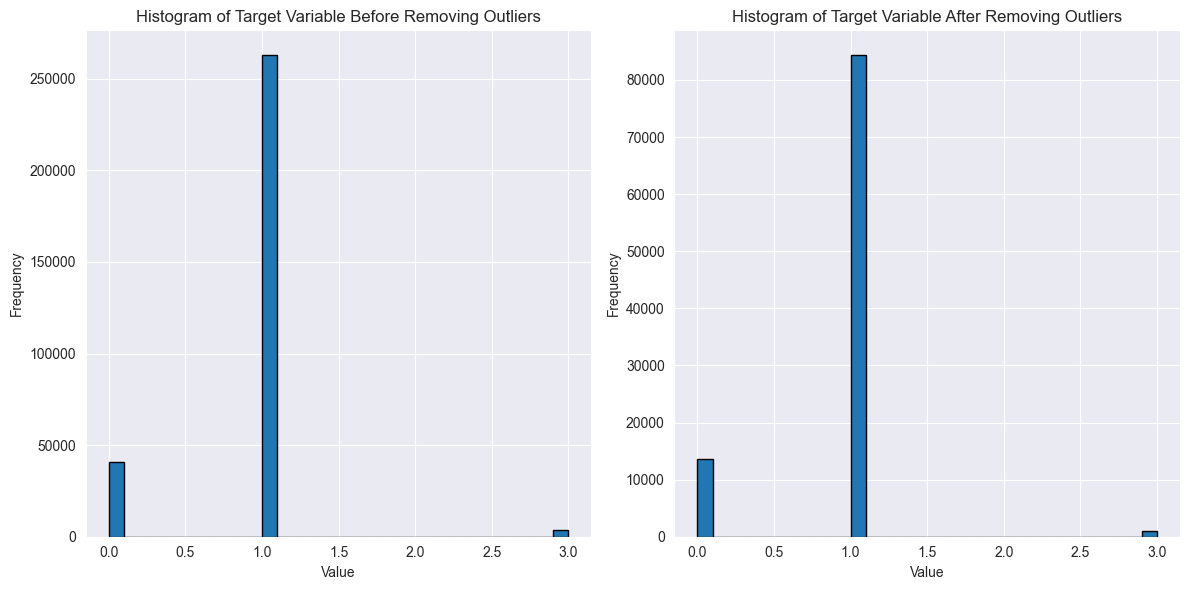

In [25]:
import matplotlib.pyplot as plt

# Histogram before removing outliers in y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(y, bins=30, edgecolor='black')
plt.title('Histogram of Target Variable Before Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers in y
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(y_cleaned_outliers_iqr, bins=30, edgecolor='black')
plt.title('Histogram of Target Variable After Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


COMPARING THE ORIGINAL X WITH THE X_cleaned_outliers_iqr AFTER OUTLINERS REMOVED

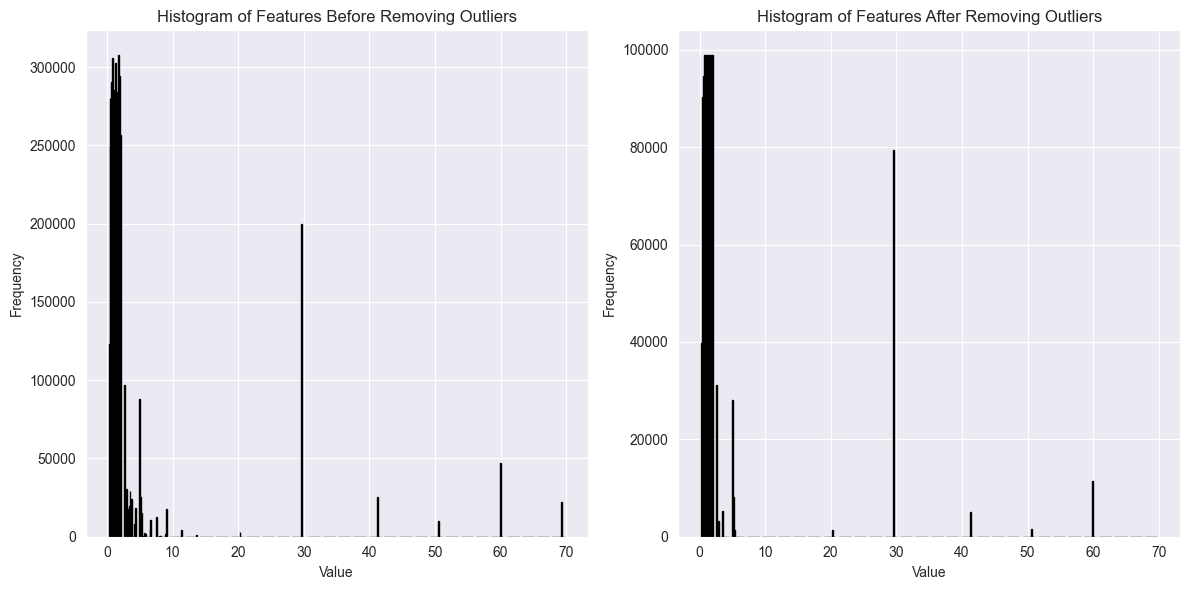

In [26]:
import matplotlib.pyplot as plt

# Histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(X, bins=30, edgecolor='black')
plt.title('Histogram of Features Before Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(X_cleaned_outliers_iqr, bins=30, edgecolor='black')
plt.title('Histogram of Features After Removing Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


CORRELATION AFTER IQR OUTLINERS REMOVED

Correlation of numerical features with Accident Severity (After Removing Outliers):
Number_of_Vehicles         0.083080
Road_Surface_Conditions    0.015959
Day_of_Week               -0.004477
Light_Conditions          -0.005752
Junction_Detail           -0.009650
Junction_Control          -0.019619
Speed_limit               -0.022762
Urban_or_Rural_Area       -0.023016
Carriageway_Hazards             NaN
Number_of_Casualties            NaN
Road_Type                       NaN
Weather_Conditions              NaN
Vehicle_Type                    NaN
dtype: float64


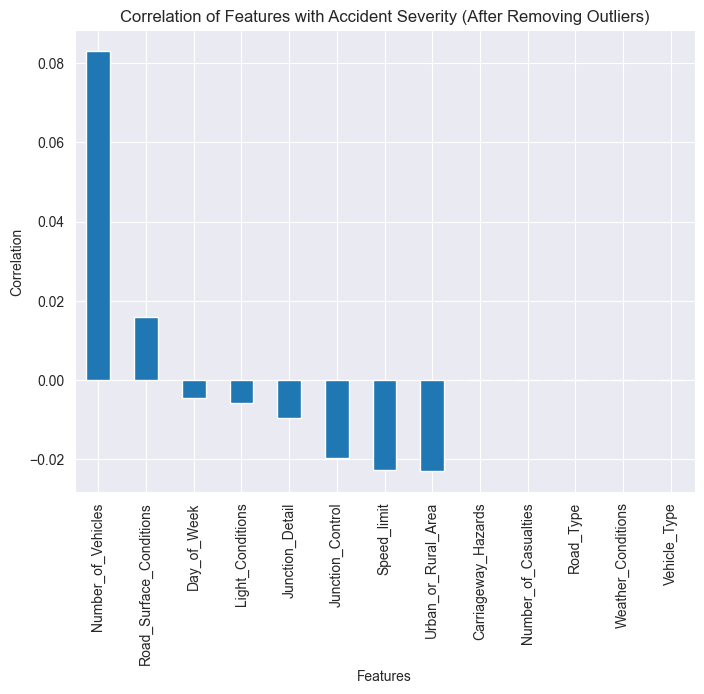


P-value from Chi-squared test for categorical features (After Removing Outliers):


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# For numerical features, we can calculate the correlation with the target
correlations_cleaned = X_cleaned_outliers_iqr.corrwith(y_cleaned_outliers_iqr).sort_values(ascending=False)
print("Correlation of numerical features with Accident Severity (After Removing Outliers):")
print(correlations_cleaned)

# Plot correlation with the target variable
plt.figure(figsize=(8, 6))
correlations_cleaned.plot(kind='bar')
plt.title('Correlation of Features with Accident Severity (After Removing Outliers)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# For categorical features, we can perform a Chi-squared test for independence
print("\nP-value from Chi-squared test for categorical features (After Removing Outliers):")
for column in X_cleaned_outliers_iqr.select_dtypes(include=['object', 'bool', 'category']).columns:
    # Create a cross-tabulation
    contingency_table_cleaned = pd.crosstab(X_cleaned_outliers_iqr[column], y_cleaned_outliers_iqr)

    # Perform the Chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table_cleaned)

    # Print the p_value
    print(f"{column} (After Removing Outliers): p-value = {p_value}")

    # Plotting pointplot for categorical features
    plt.figure(figsize=(8, 4))
    sns.pointplot(x=y_cleaned_outliers_iqr, y=X_cleaned_outliers_iqr[column].astype('category').cat.codes)
    plt.title(f'Relationship between {column} and Accident Severity (After Removing Outliers, p-value = {p_value:.4f})')
    plt.xlabel('Accident Severity')
    plt.ylabel('Encoded ' + column)
    plt.show()


In [28]:
# Check if any null values exist in y_cleaned
null_values_in_y = y_cleaned_outliers_iqr.isnull().any()
print("\nNull values in y_cleaned:")
print(null_values_in_y)

# If you want to know the count of null values
null_counts_in_y = y_cleaned_outliers_iqr.isnull().sum()
print("\nCount of Null values in y_cleaned:")
print(null_counts_in_y)



Null values in y_cleaned:
False

Count of Null values in y_cleaned:
0


In [29]:
# Check if any null values exist in X_cleaned
null_values_in_X = X_cleaned_outliers_iqr.isnull().any()
print("Null values in X_cleaned:")
print(null_values_in_X)

# If you want to know the count of null values in each column
null_counts_in_X = X_cleaned_outliers_iqr.isnull().sum()
print("\nCount of Null values in each column of X_cleaned:")
print(null_counts_in_X)


Null values in X_cleaned:
Day_of_Week                False
Junction_Control           False
Junction_Detail            False
Light_Conditions           False
Carriageway_Hazards        False
Number_of_Casualties       False
Number_of_Vehicles         False
Road_Surface_Conditions    False
Road_Type                  False
Speed_limit                False
Urban_or_Rural_Area        False
Weather_Conditions         False
Vehicle_Type               False
dtype: bool

Count of Null values in each column of X_cleaned:
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64


In [30]:
# Remove features with NaN correlations from the correlation series
correlations_cleaned = correlations_cleaned.dropna()

# Now print and plot the correlations again
print("Correlation of numerical features with Accident Severity (After Removing Outliers and NaN):")
print(correlations_cleaned)


Correlation of numerical features with Accident Severity (After Removing Outliers and NaN):
Number_of_Vehicles         0.083080
Road_Surface_Conditions    0.015959
Day_of_Week               -0.004477
Light_Conditions          -0.005752
Junction_Detail           -0.009650
Junction_Control          -0.019619
Speed_limit               -0.022762
Urban_or_Rural_Area       -0.023016
dtype: float64


CORRELATION MATRIX FOR THE IQR OUTLINERS AFTER CLEANING

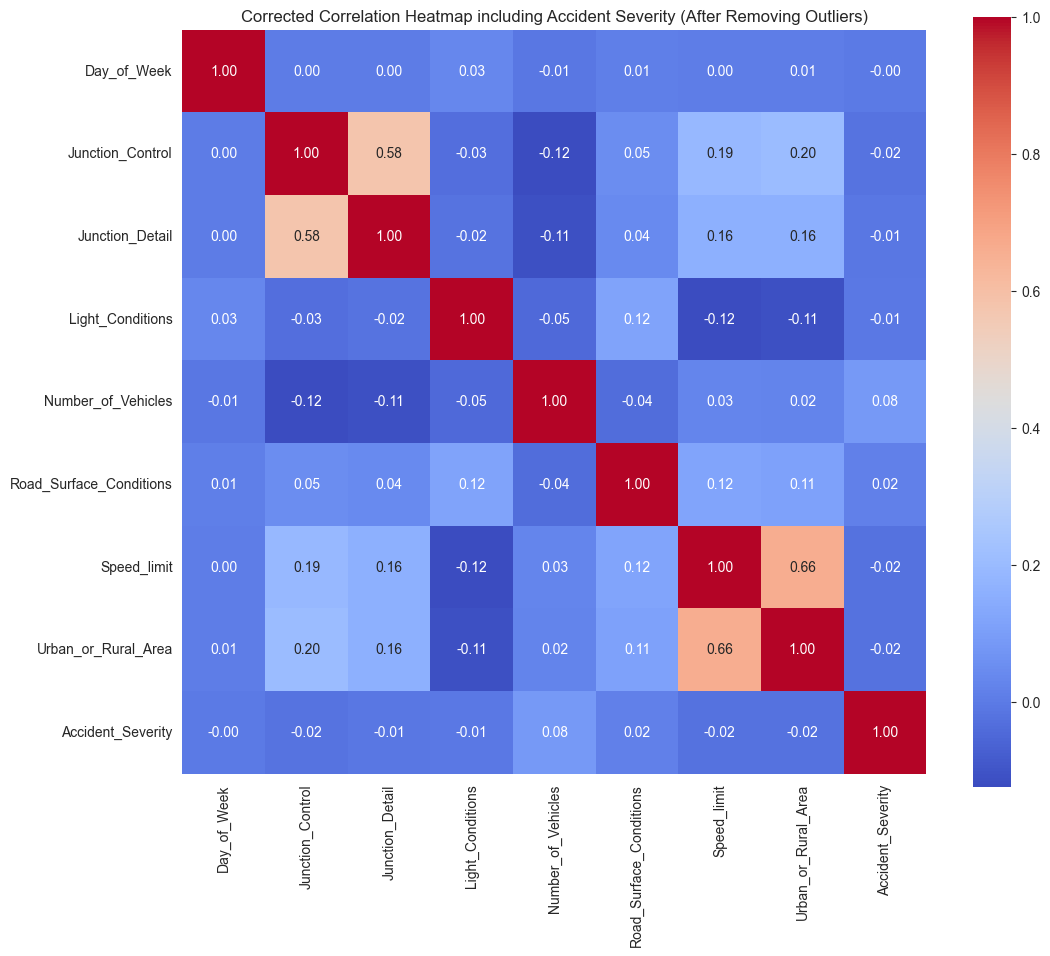

In [31]:
# Add the cleaned target variable back to X_cleaned for the purpose of finding correlations
X_with_target_cleaned = X_cleaned_outliers_iqr.copy()
X_with_target_cleaned['Accident_Severity'] = y_cleaned_outliers_iqr

# Calculate the correlation matrix including the cleaned target variable
correlation_matrix_cleaned = X_with_target_cleaned.corr()

# Remove columns and rows with NaN values from the correlation matrix
correlation_matrix_cleaned = correlation_matrix_cleaned.dropna(axis=0, how='all').dropna(axis=1, how='all')


# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Corrected Correlation Heatmap including Accident Severity (After Removing Outliers)')
plt.show()



Distribution of Numerical Features in X_with_target_cleaned:


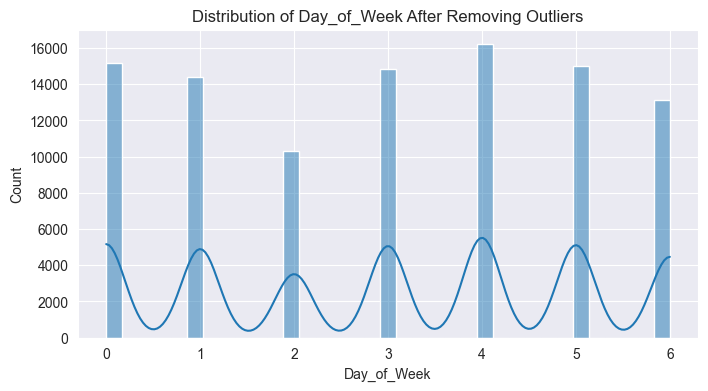

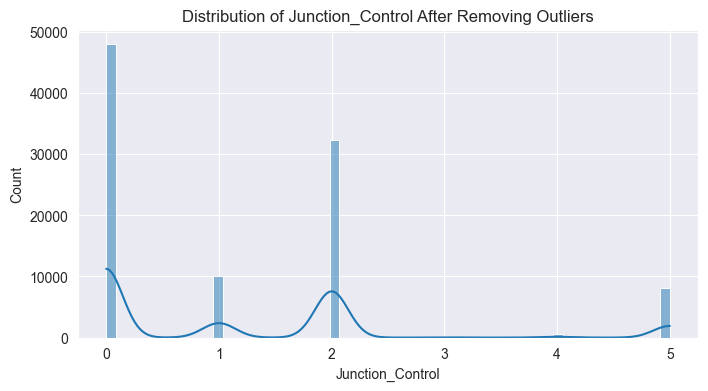

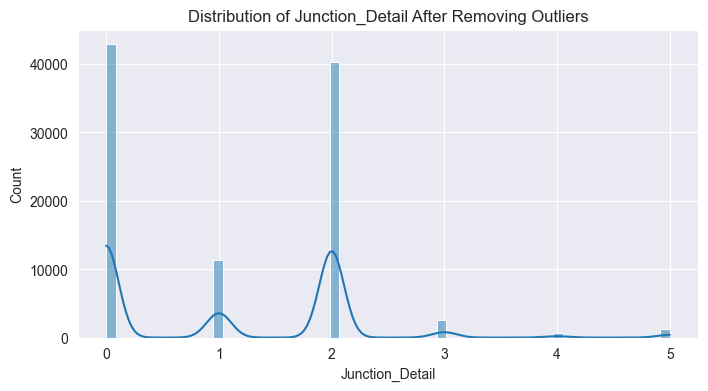

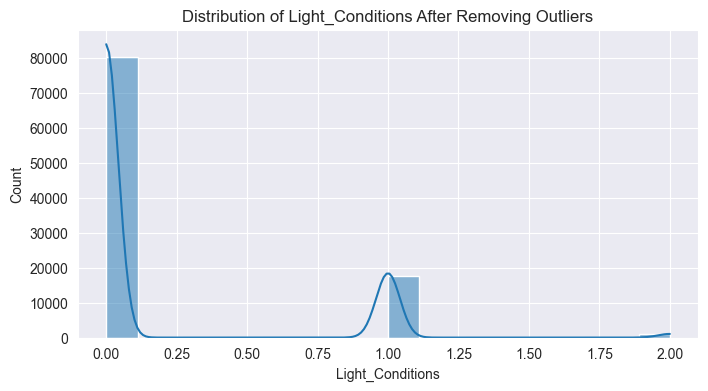

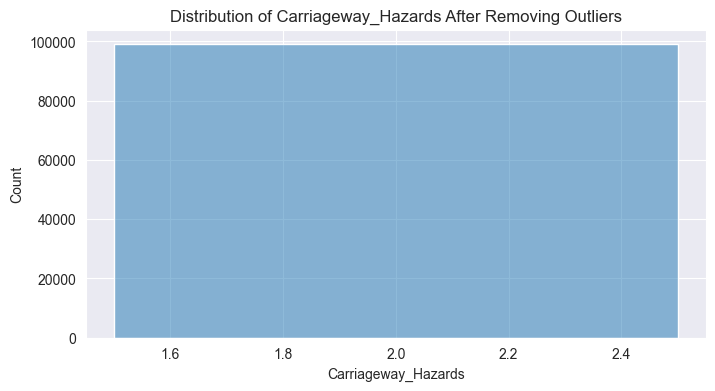

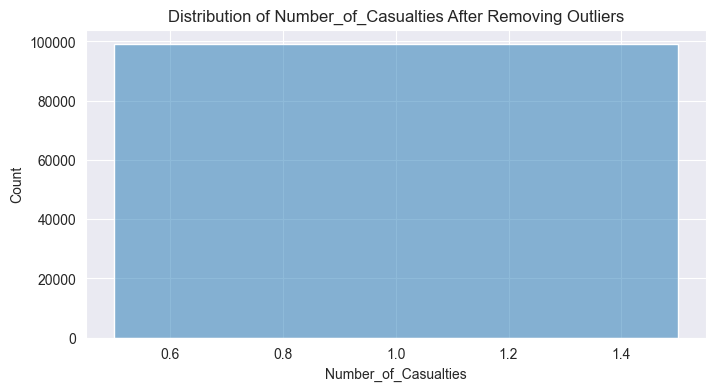

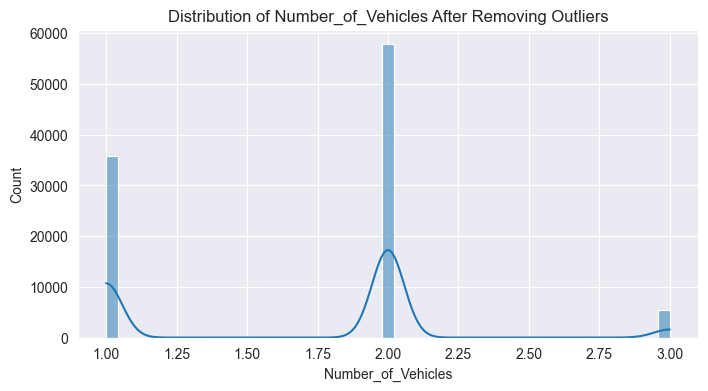

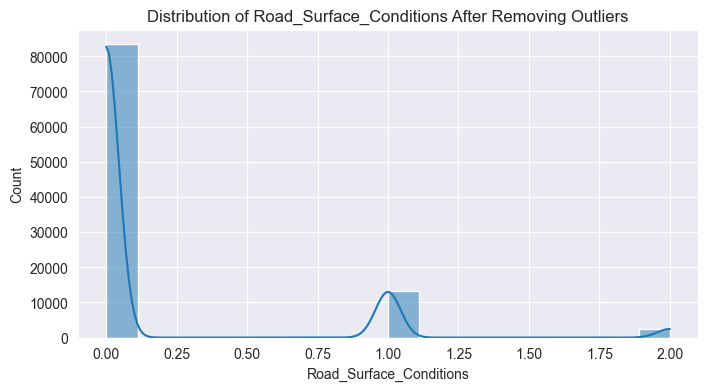

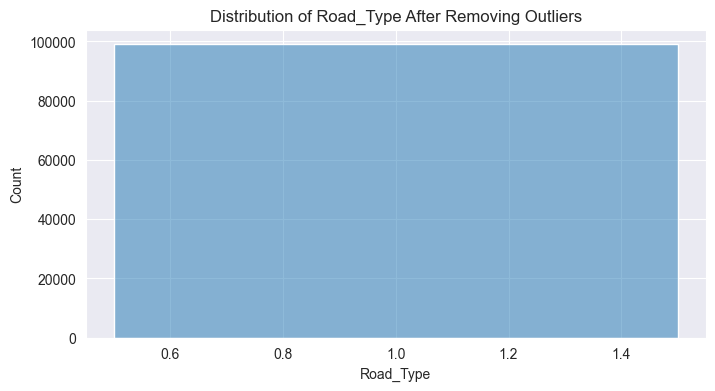

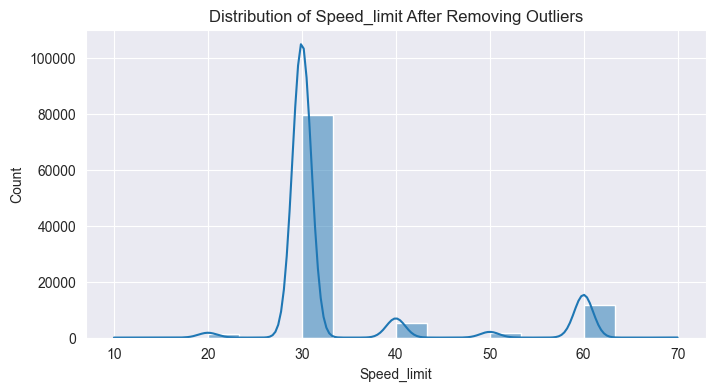

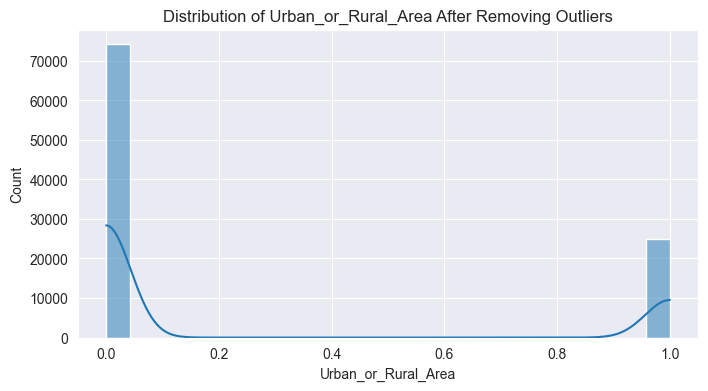

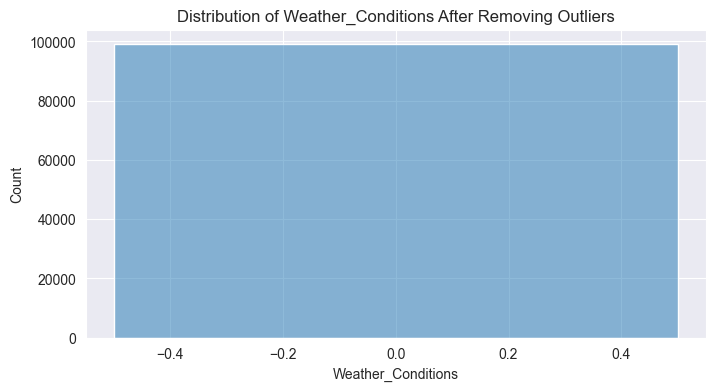

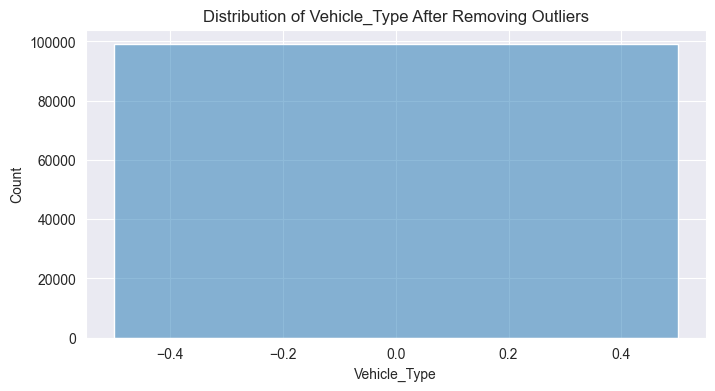

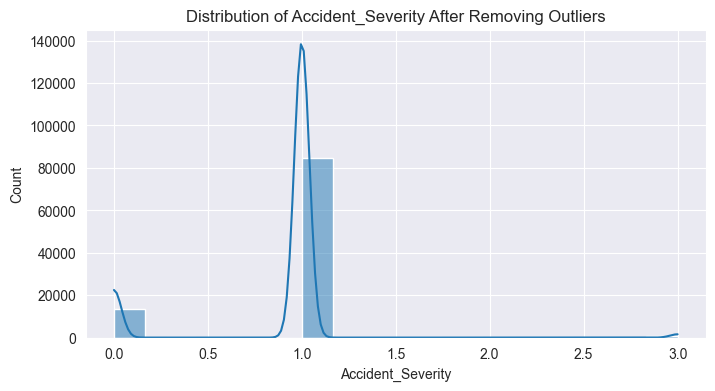

In [32]:
# Distribution of numerical features in X_cleaned (after removing outliers)
print("\nDistribution of Numerical Features in X_with_target_cleaned:")
for column in X_with_target_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_with_target_cleaned[column], kde=True)
    plt.title(f'Distribution of {column} After Removing Outliers')
    plt.show()



Relationship Between Features and Target Variable After Removing Outliers:


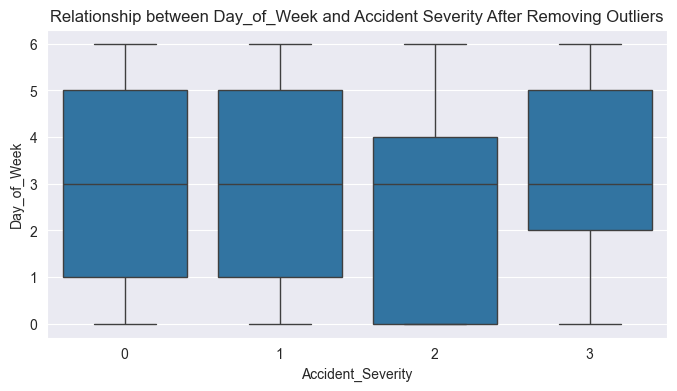

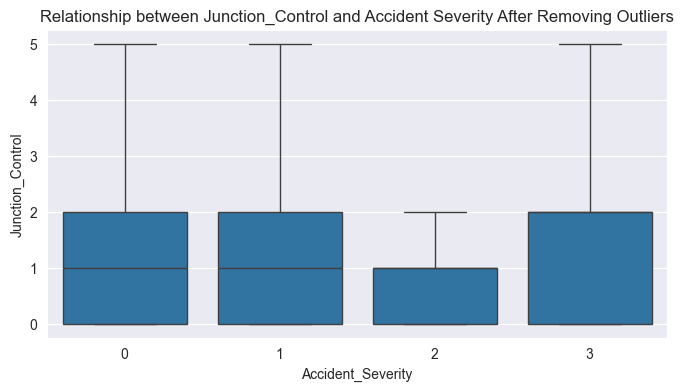

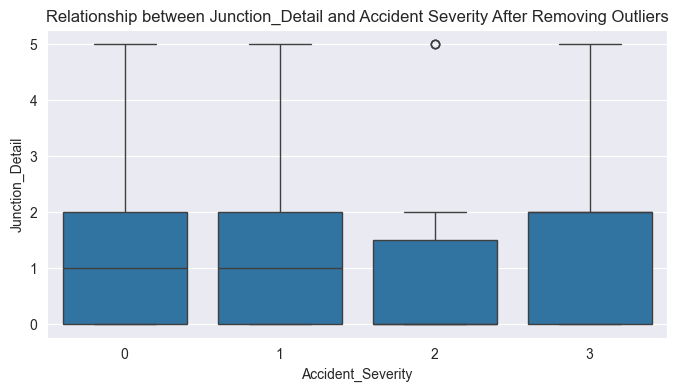

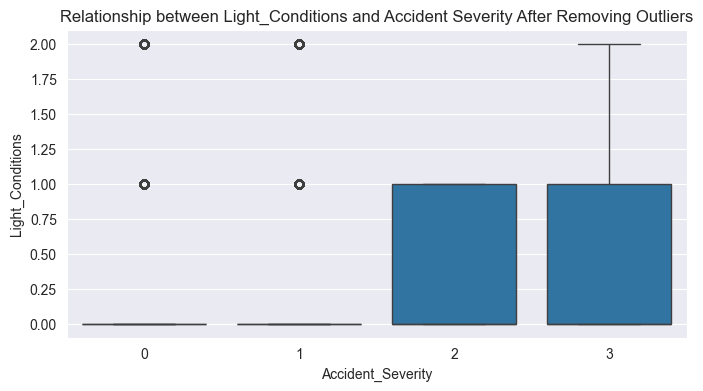

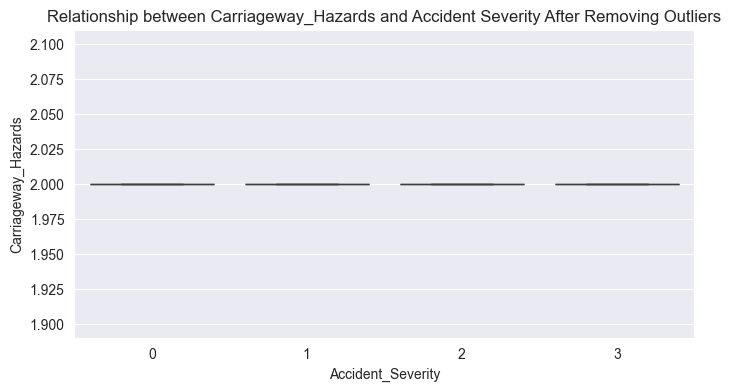

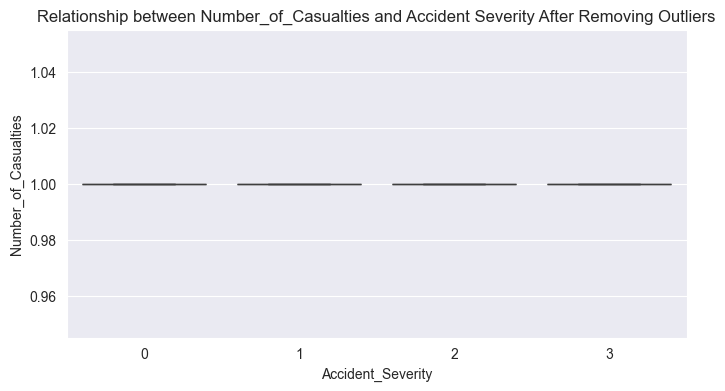

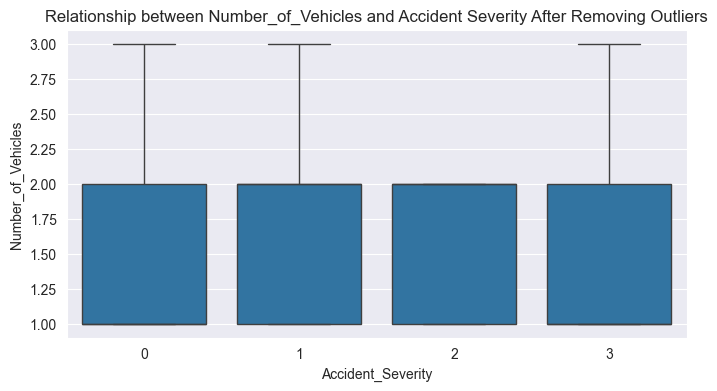

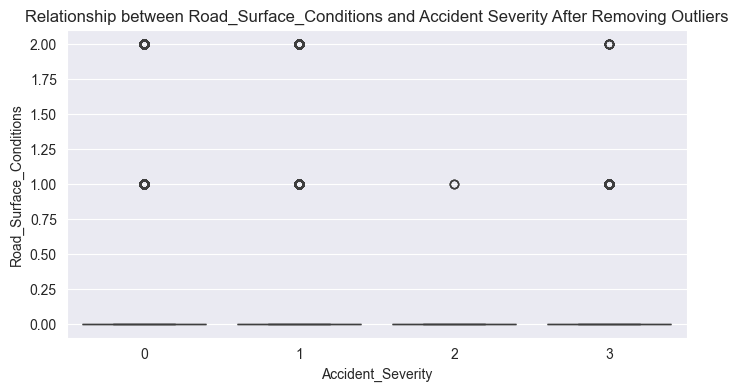

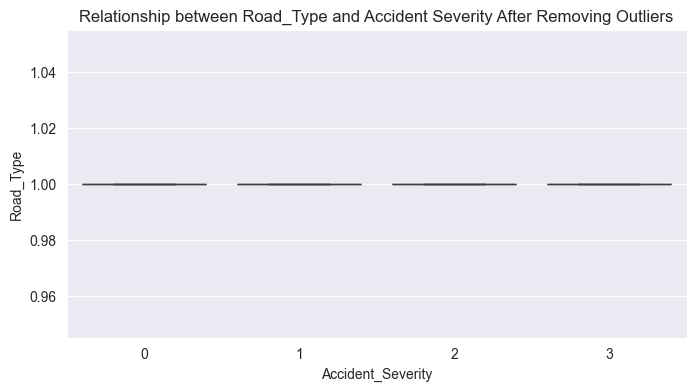

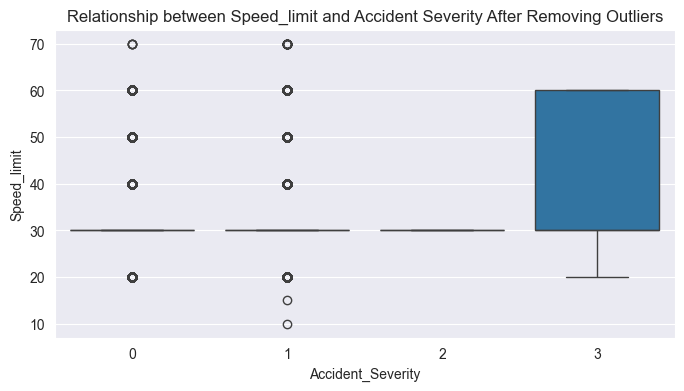

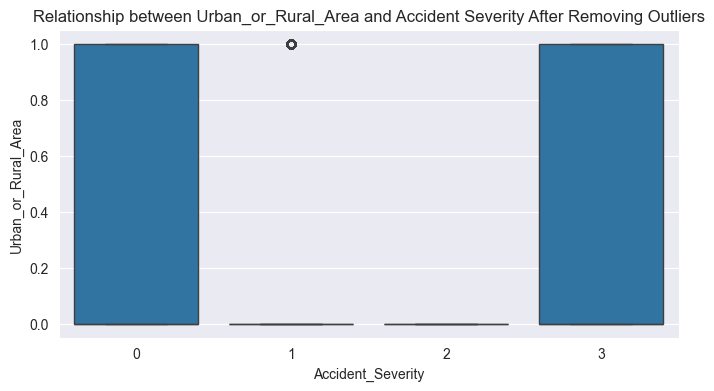

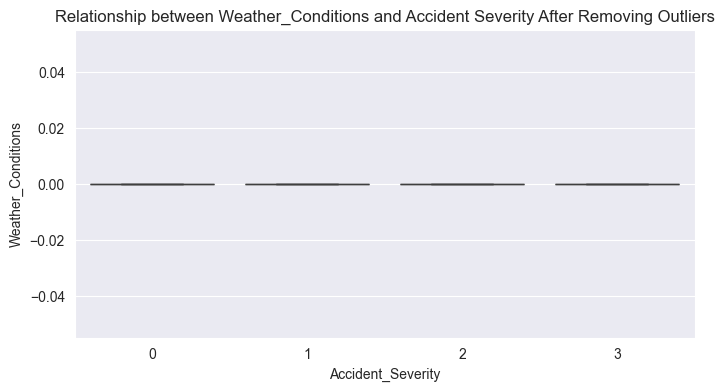

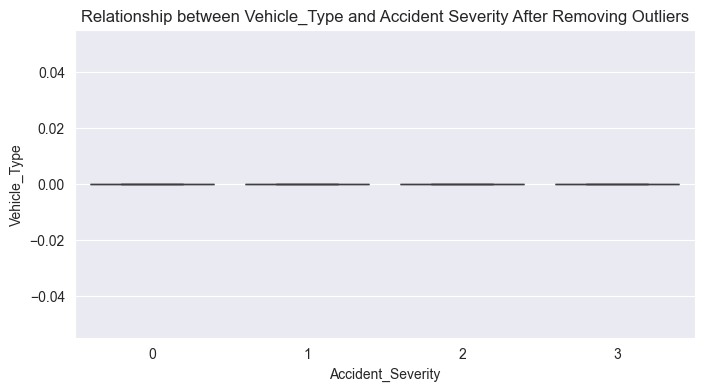

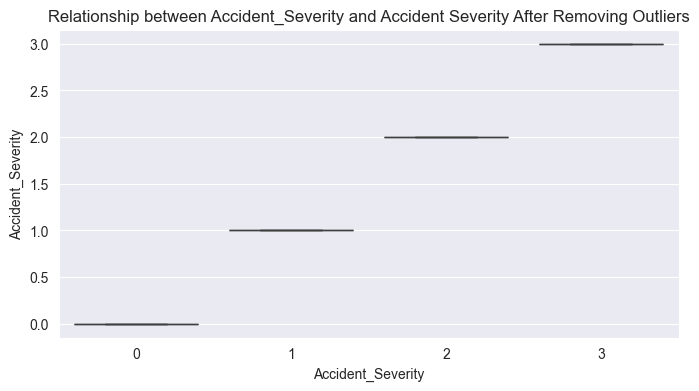

In [33]:
# Analyzing the relationship between each feature in X_with_target_cleaned and the target variable y_cleaned
print("\nRelationship Between Features and Target Variable After Removing Outliers:")
for column in X_with_target_cleaned.columns:
    if X_with_target_cleaned[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=y_cleaned_outliers_iqr, y=X_with_target_cleaned[column])
        plt.title(f'Relationship between {column} and Accident Severity After Removing Outliers')
        plt.show()


CLUSTERS AFTER IQR REMOVED

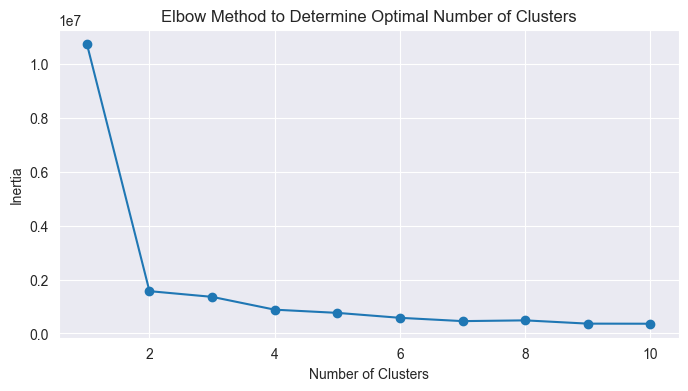

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cleaned_outliers_iqr)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_cleaned_outliers_iqr)

# Add the cluster labels to your dataset
X_with_clusters = X_cleaned_outliers_iqr.copy()
X_with_clusters['Cluster'] = clusters


In [35]:
# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_cleaned_outliers_iqr.shape)
print("Shape of y after removing outliers:", y_cleaned_outliers_iqr.shape)

Shape of X after removing outliers: (99024, 13)
Shape of y after removing outliers: (99024,)


IQR - SMOTE

In [36]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare the features and target variable
X = X_cleaned_outliers_iqr.drop(['Weather_Conditions', 'Road_Type', 'Junction_Detail',
                              'Day_of_Week', 'Carriageway_Hazards', 'Vehicle_Type',
                              'Number_of_Casualties', 'Junction_Control',
                              'Urban_or_Rural_Area'], axis=1)
y = y_cleaned_outliers_iqr

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Now, X_train_smote and y_train_smote can be used to train a machine learning model
print(X_train_smote.shape)
print(X_test_scaled.shape)
print(y_train_smote.shape)
print(y_test.shape)

(270208, 4)
(19805, 4)
(270208,)
(19805,)


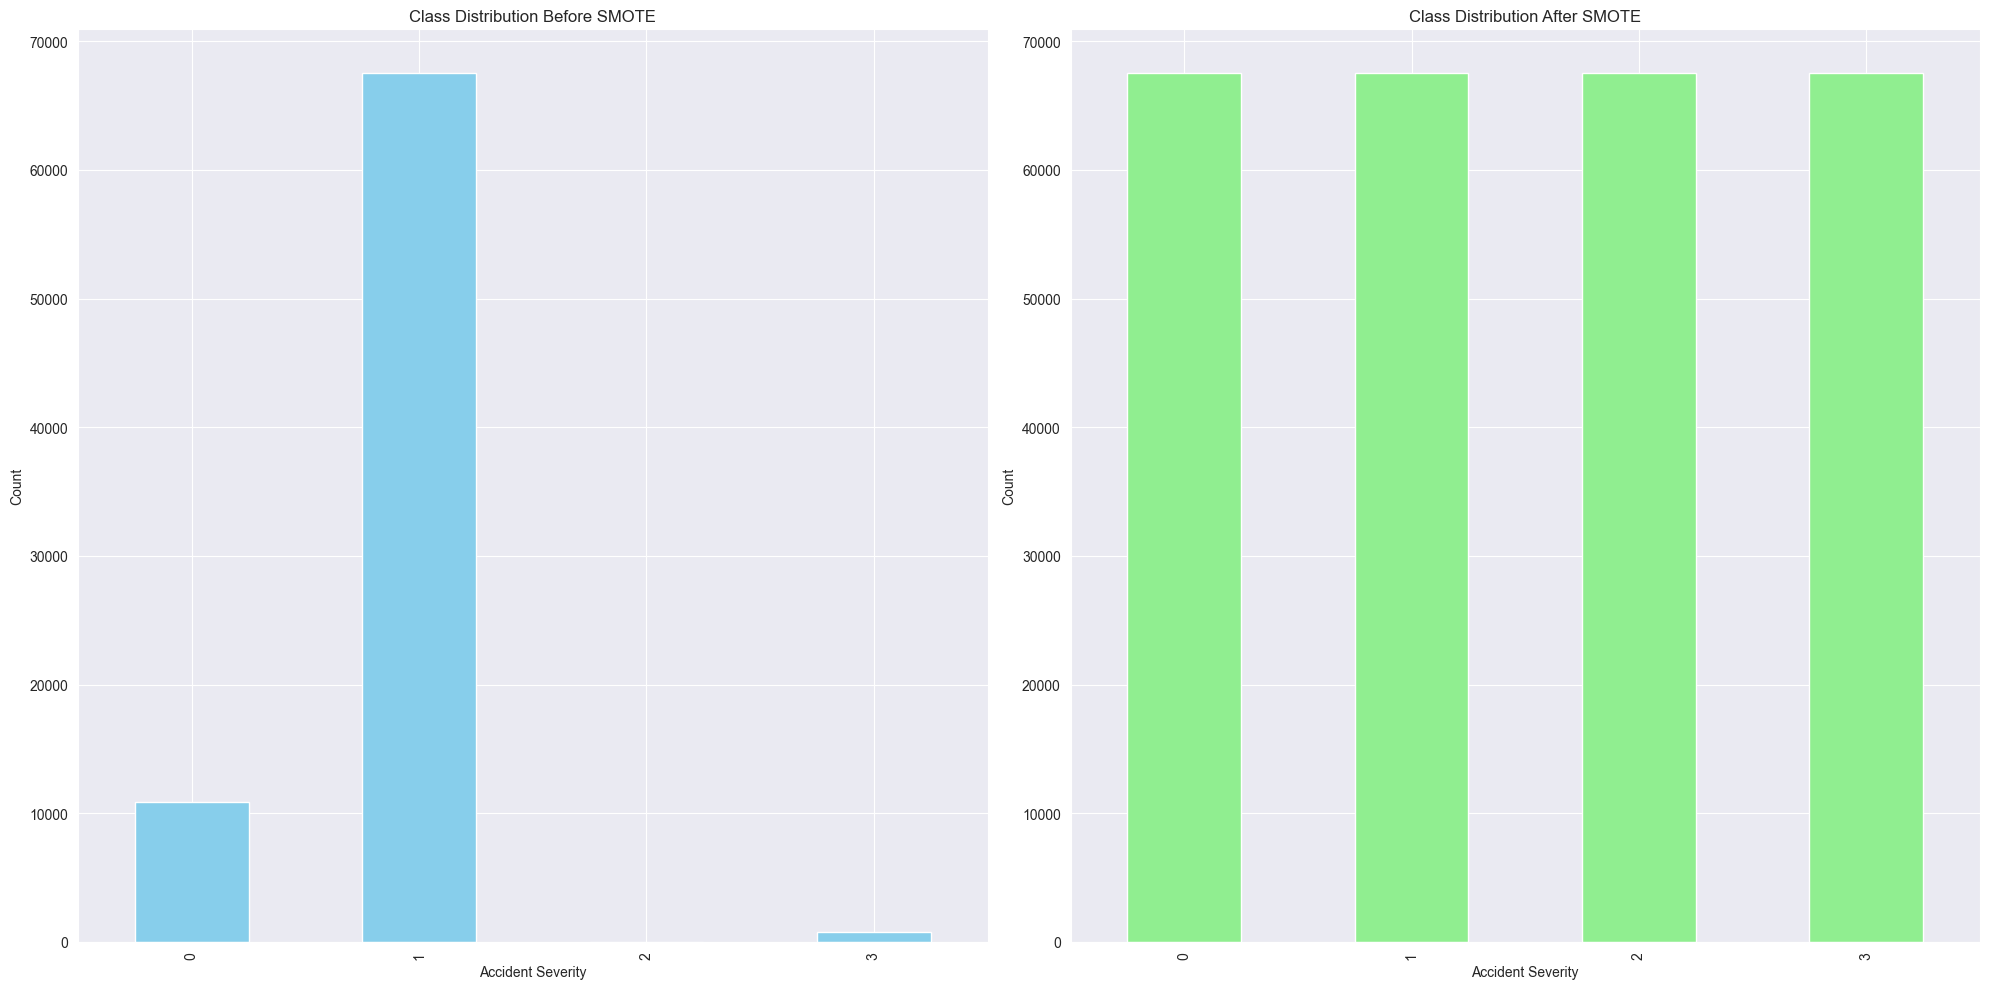

In [37]:
# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Before SMOTE
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Count')

# After SMOTE
y_train_smote.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Accident Severity')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

IQR - PCA

In [38]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# Apply PCA to the SMOTE-balanced training data
pca = PCA()
pca.fit(X_train_smote)


PCA()

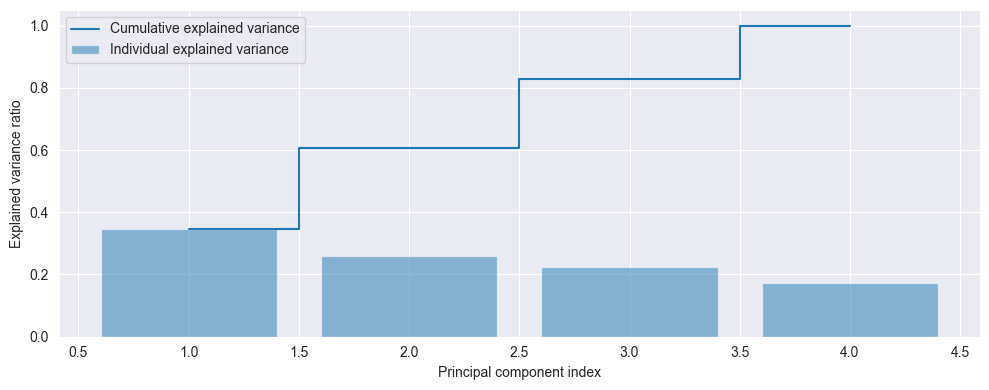

In [39]:
# Calculate and visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Select the number of components based on cumulative explained variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)

In [40]:
# Print the number of components used
print(f"Number of Principal Components used: {pca.n_components_}")

Number of Principal Components used: 4


In [41]:
# This function identifies the elbow point
def find_elbow_point(cumulative_variance_ratio):
    differences = np.diff(cumulative_variance_ratio)
    elbows = np.where(differences < 0.01)[0]
    return elbows[0] + 1 if len(elbows) > 0 else np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Find and print the elbow point
elbow_point = find_elbow_point(cumulative_variance_ratio)
print(f"The elbow point is at component number: {elbow_point}")

The elbow point is at component number: 4


In [42]:
# Access and print the 4th component
fourth_component = pca.components_[3]
print("Values in the 4th PCA Component:\n", fourth_component)

Values in the 4th PCA Component:
 [-0.39128559  0.14001607  0.83322794 -0.3647222 ]


In [43]:
# Print the columns in the DataFrames
print("Columns in X_train_pca:", X_train_pca.shape)
print("Columns in X_test_pca:", X_test_pca.shape)

# After verifying the correct column names, you can modify the `desired_columns` list accordingly


Columns in X_train_pca: (270208, 4)
Columns in X_test_pca: (19805, 4)


MODELS FOR IQR OUTLINERS

KNN

The optimal number of neighbors is 2


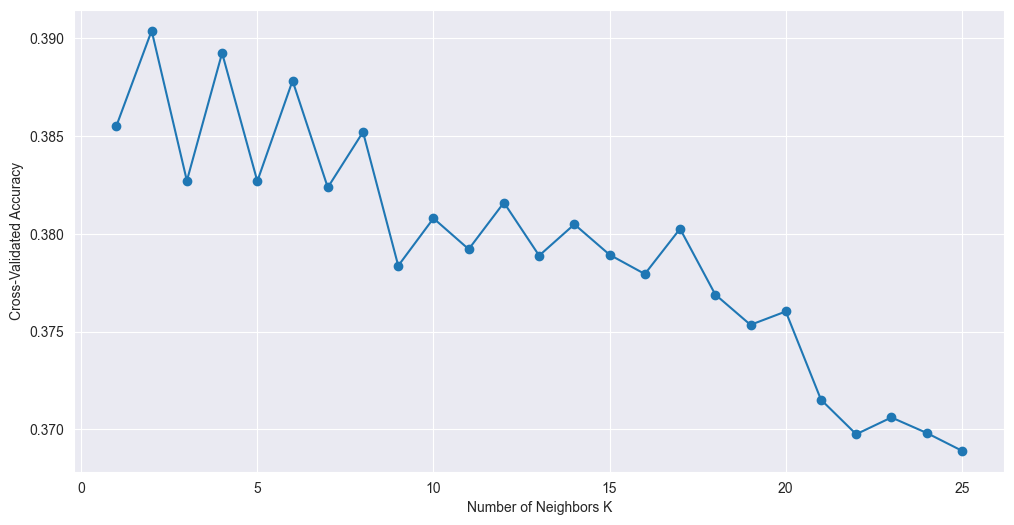

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of 'n_neighbors' to try
neighbors = range(1, 26)

# Empty list to store mean cross-validated scores
cv_scores = []

# Perform 10-fold cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='ball_tree', metric='euclidean')
    scores = cross_val_score(knn, X_train_pca, y_train_smote, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Finding the optimal number of neighbors
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plot accuracy vs number of neighbors
plt.figure(figsize=(12, 6))
plt.plot(neighbors, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

knn_model = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='ball_tree',metric='euclidean')

knn_model.fit(X_train_pca, y_train_smote)

y_pred_knn = knn_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{conf_matrix}")
print("Classification report\n"+classification_report(y_test, y_pred_knn))

Accuracy: 0.4477152234284272
Precision: 0.7370733476157397
Recall: 0.4477152234284272
F1 Score: 0.5226391846746499
Confusion Matrix: 
[[1405 1294    0    0]
 [9448 7462    0    0]
 [   1    2    0    0]
 [  97   96    0    0]]
Classification report
              precision    recall  f1-score   support

           0       0.13      0.52      0.21      2699
           1       0.84      0.44      0.58     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.45     19805
   macro avg       0.24      0.24      0.20     19805
weighted avg       0.74      0.45      0.52     19805



In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance' ,metric='euclidean')

knn_model.fit(X_train_pca, y_train_smote)

y_pred_knn = knn_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{conf_matrix}")
print("Classification report\n"+classification_report(y_test, y_pred_knn))

Accuracy: 0.7753092653370361
Precision: 0.770266716638856
Recall: 0.7753092653370361
F1 Score: 0.7727717918792163
Confusion Matrix: 
[[  592  2107     0     0]
 [ 2147 14763     0     0]
 [    0     3     0     0]
 [   67   126     0     0]]
Classification report
              precision    recall  f1-score   support

           0       0.21      0.22      0.22      2699
           1       0.87      0.87      0.87     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.78     19805
   macro avg       0.27      0.27      0.27     19805
weighted avg       0.77      0.78      0.77     19805



In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm='ball_tree',metric='euclidean')

knn_model.fit(X_train_pca, y_train_smote)

y_pred_knn = knn_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix: \n{conf_matrix}")
print("Classification report\n"+classification_report(y_test, y_pred_knn))

Accuracy: 0.4477152234284272
Precision: 0.7370733476157397
Recall: 0.4477152234284272
F1 Score: 0.5226391846746499
Confusion Matrix: 
[[1405 1294    0    0]
 [9448 7462    0    0]
 [   1    2    0    0]
 [  97   96    0    0]]
Classification report
              precision    recall  f1-score   support

           0       0.13      0.52      0.21      2699
           1       0.84      0.44      0.58     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.45     19805
   macro avg       0.24      0.24      0.20     19805
weighted avg       0.74      0.45      0.52     19805



XGBOOST

In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create an XGBoost model
xgb_model = XGBClassifier()

# Train the model on your training data
xgb_model.fit(X_train_pca, y_train_smote)

# Make predictions on your test data
y_pred = xgb_model.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.33      0.23      2699
           1       0.90      0.23      0.37     16910
           2       0.00      0.33      0.00         3
           3       0.02      0.46      0.04       193

    accuracy                           0.25     19805
   macro avg       0.28      0.34      0.16     19805
weighted avg       0.79      0.25      0.35     19805

[[ 880  398  634  787]
 [4089 3905 5973 2943]
 [   1    1    1    0]
 [  50   28   26   89]]


RANDOM FOREST

In [76]:

from sklearn.ensemble import RandomForestClassifier
#create model
clf_rf=RandomForestClassifier(max_depth=90,n_estimators=850)
#fit model
clf_rf.fit(X_train_pca,y_train_smote)

#predict model
y_pred=clf_rf.predict(X_test_pca)

#evaluate model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.33      0.23      2699
           1       0.90      0.23      0.37     16910
           2       0.00      0.33      0.00         3
           3       0.02      0.46      0.04       193

    accuracy                           0.25     19805
   macro avg       0.27      0.34      0.16     19805
weighted avg       0.79      0.25      0.35     19805

[[ 879  402  634  784]
 [4082 3930 5973 2925]
 [   1    1    1    0]
 [  49   29   26   89]]


In [77]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(max_depth=50,n_estimators=550)
clf_rf.fit(X_train_pca,y_train_smote)
y_pred=clf_rf.predict(X_test_pca)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.33      0.23      2699
           1       0.90      0.23      0.37     16910
           2       0.00      0.33      0.00         3
           3       0.02      0.46      0.04       193

    accuracy                           0.25     19805
   macro avg       0.27      0.34      0.16     19805
weighted avg       0.79      0.25      0.35     19805

[[ 879  402  634  784]
 [4082 3930 5973 2925]
 [   1    1    1    0]
 [  49   29   26   89]]


Grid SearchCV


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid to search over
param_grid = {
    'max_depth': [10, 20, 30],
    'n_estimators': [100, 200, 300],
    # Add more parameters to search over if needed
}

# Create the Random Forest classifier
clf_rf = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator (model) obtained from the grid search
best_clf_rf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_clf_rf.predict(X_test_scaled)



# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.33      0.23      2699
           1       0.90      0.23      0.37     16910
           2       0.00      0.33      0.00         3
           3       0.02      0.46      0.04       193

    accuracy                           0.25     19805
   macro avg       0.28      0.34      0.16     19805
weighted avg       0.79      0.25      0.35     19805

Confusion Matrix:
[[ 879  402  634  784]
 [4081 3931 5973 2925]
 [   1    1    1    0]
 [  49   29   26   89]]


k-cross validation for RF


In [79]:

from sklearn.model_selection import cross_val_score
import numpy as np

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Set the number of folds for cross-validation (e.g., k=5 for 5-fold cross-validation)
k_fold = 5

# Perform K-fold cross-validation
cross_val_scores = cross_val_score(clf_rf, X_train_smote, y_train_smote, cv=k_fold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")


Cross-Validation Scores: [0.4690796  0.46944969 0.46628548 0.46979145 0.4666642 ]
Mean Accuracy: 0.4683
Standard Deviation: 0.0015


SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', C=100, gamma = 0.1 , decision_function_shape='ovr')

# Train the model on your training data
svm_model.fit(X_train_pca,  y_train_smote)

# Make predictions on your test data
y_pred = svm_model.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.18      0.33      0.23      2699
           1       0.90      0.23      0.37     16910
           2       0.00      0.33      0.00         3
           3       0.02      0.44      0.04       193

    accuracy                           0.25     19805
   macro avg       0.28      0.33      0.16     19805
weighted avg       0.79      0.25      0.35     19805

[[ 901  401  634  763]
 [4119 3925 5973 2893]
 [   1    1    1    0]
 [  55   28   26   84]]


In [81]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', C=1000, gamma = 1 , decision_function_shape='ovo')

# Train the model on your training data
svm_model.fit(X_train_pca, y_train_smote)

# Make predictions on your test data
y_pred = svm_model.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.18      0.33      0.23      2699
           1       0.90      0.23      0.37     16910
           2       0.00      0.33      0.00         3
           3       0.02      0.46      0.04       193

    accuracy                           0.25     19805
   macro avg       0.28      0.34      0.16     19805
weighted avg       0.79      0.25      0.35     19805

[[ 880  398  634  787]
 [4089 3905 5973 2943]
 [   1    1    1    0]
 [  50   28   26   89]]


In [82]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train_subset = X_train_pca[:50000]
y_train_subset = y_train_smote[:50000]

X_test_subset = X_test_pca[:50000]
y_test_subset = y_test[:50000]

# Create an SVM model with specified parameters
svm_model_ovr_c_hundred_subset = SVC(kernel='linear', C=100, gamma=0.1)

# Train the model on your subset of training data
svm_model_ovr_c_hundred_subset.fit(X_train_subset, y_train_subset)

# Make predictions on your subset of test data
y_pred_subset = svm_model_ovr_c_hundred_subset.predict(X_test_subset)


print(classification_report(y_test_subset, y_pred_subset))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2699
           1       0.85      1.00      0.92     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.85     19805
   macro avg       0.21      0.25      0.23     19805
weighted avg       0.73      0.85      0.79     19805



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Z-score

In [83]:
import pandas as pd
from scipy import stats
import numpy as np
#using transformed dataset
y_Z_score_outliners = transformed_dataset['Accident_Severity']
X_Z_score_outliners = transformed_dataset.drop('Accident_Severity', axis=1)

# Calculating Z-scores of the data
z = np.abs(stats.zscore(X_Z_score_outliners))

# Define a threshold to identify outliers
threshold = 3

# Print out the descriptive statistics for numerical features in X
print("Descriptive Statistics for Numerical Features in X:")
print(X_Z_score_outliners.describe())

# Identify outliers
outliers_Z_score = np.where(z > threshold)

print("\nOutliers (Row Index, Column Index):")
print(list(zip(outliers_Z_score[0], outliers_Z_score[1])))

# Print information about outliers
print(f"Number of Outliers Detected: {len(outliers_Z_score)}")

Descriptive Statistics for Numerical Features in X:
         Day_of_Week  Junction_Control  Junction_Detail  Light_Conditions  \
count  307972.000000     307972.000000    307972.000000     307972.000000   
mean        3.031373          1.181711         1.797810          0.439907   
std         1.998390          1.467584         1.857133          0.965213   
min         0.000000          0.000000         0.000000          0.000000   
25%         1.000000          0.000000         0.000000          0.000000   
50%         3.000000          1.000000         2.000000          0.000000   
75%         5.000000          2.000000         2.000000          1.000000   
max         6.000000          6.000000         8.000000          4.000000   

       Carriageway_Hazards  Number_of_Casualties  Number_of_Vehicles  \
count        307972.000000         307972.000000       307972.000000   
mean              2.009520              1.356883            1.829066   
std               0.154655            

In [84]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X_Z_score_outliners))

# Define a threshold
threshold = 3
no_outliers_mask = (z < threshold).all(axis=1)
X_Z_score_outliners_cleaned = X_Z_score_outliners[no_outliers_mask]
y_Z_score_outliners_cleaned = y_Z_score_outliners[no_outliers_mask]
print("Shape of X after removing Z-score outliers:", X_Z_score_outliners_cleaned.shape)
print("Shape of y after removing Z-score outliers:", y_Z_score_outliners_cleaned.shape)

Shape of X after removing Z-score outliers: (249102, 13)
Shape of y after removing Z-score outliers: (249102,)


PLOTS BEFORE AND AFTER Z-SCORE OUTLINERS REMOVED FOR TARGET

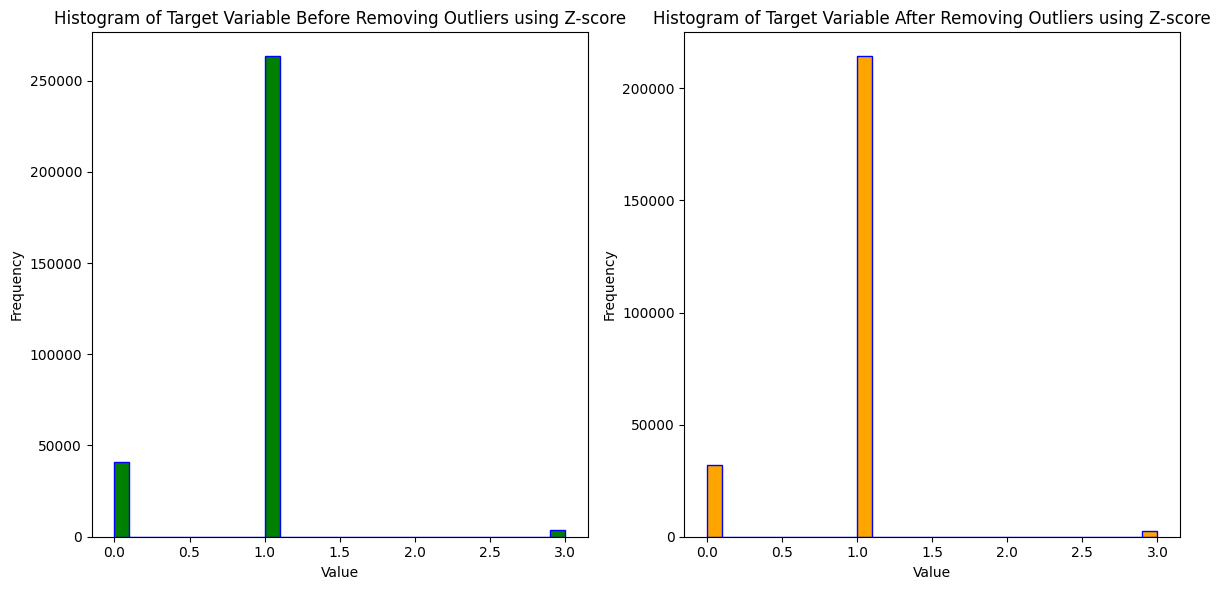

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(y_Z_score_outliners, bins=30, edgecolor='blue',color='green')
plt.title('Histogram of Target Variable Before Removing Outliers using Z-score')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(y_Z_score_outliners_cleaned, bins=30, edgecolor='blue',color='orange')
plt.title('Histogram of Target Variable After Removing Outliers using Z-score')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


PLOTS BEFORE AND AFTER Z-SCORE OUTLINERS REMOVED FOR FEATURES

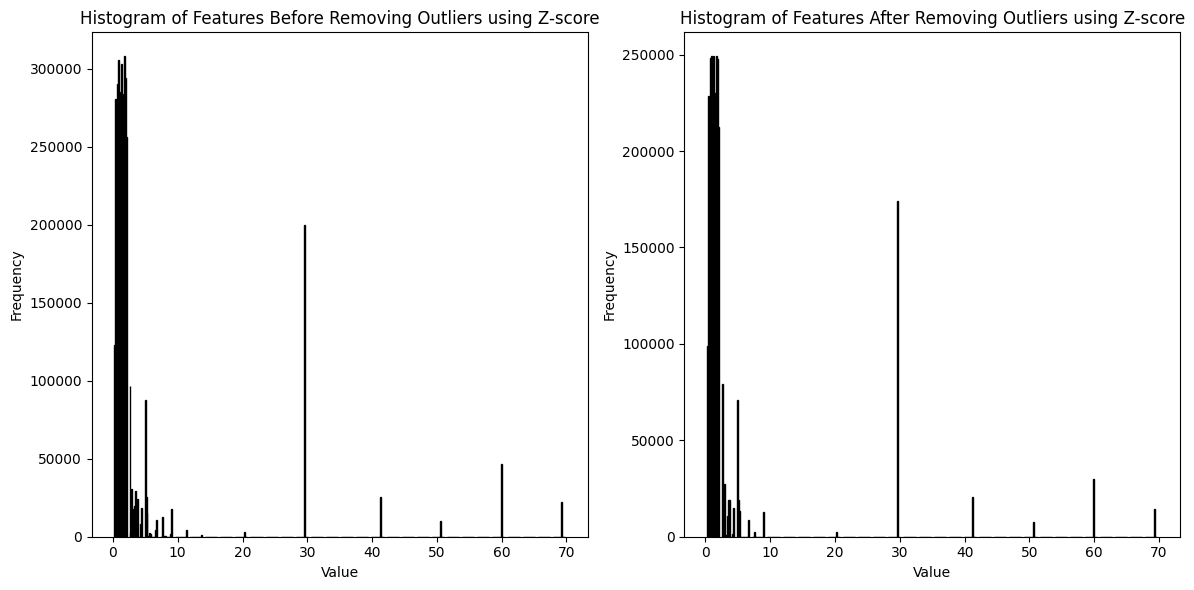

In [86]:
import matplotlib.pyplot as plt

# Histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(X_Z_score_outliners, bins=30, edgecolor='black')
plt.title('Histogram of Features Before Removing Outliers using Z-score')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram after removing outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(X_Z_score_outliners_cleaned, bins=30, edgecolor='black')
plt.title('Histogram of Features After Removing Outliers using Z-score')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


CORRELATION AFTER Z-SCORE OUTLINERS

Correlation of numerical features with Accident Severity (After Removing Outliers using Z-score):
Number_of_Vehicles         0.079948
Road_Type                  0.031647
Road_Surface_Conditions    0.018139
Weather_Conditions         0.014592
Number_of_Casualties       0.007308
Junction_Detail            0.006800
Day_of_Week                0.000862
Vehicle_Type              -0.004332
Speed_limit               -0.005226
Light_Conditions          -0.006385
Junction_Control          -0.014059
Urban_or_Rural_Area       -0.015451
Carriageway_Hazards             NaN
dtype: float64


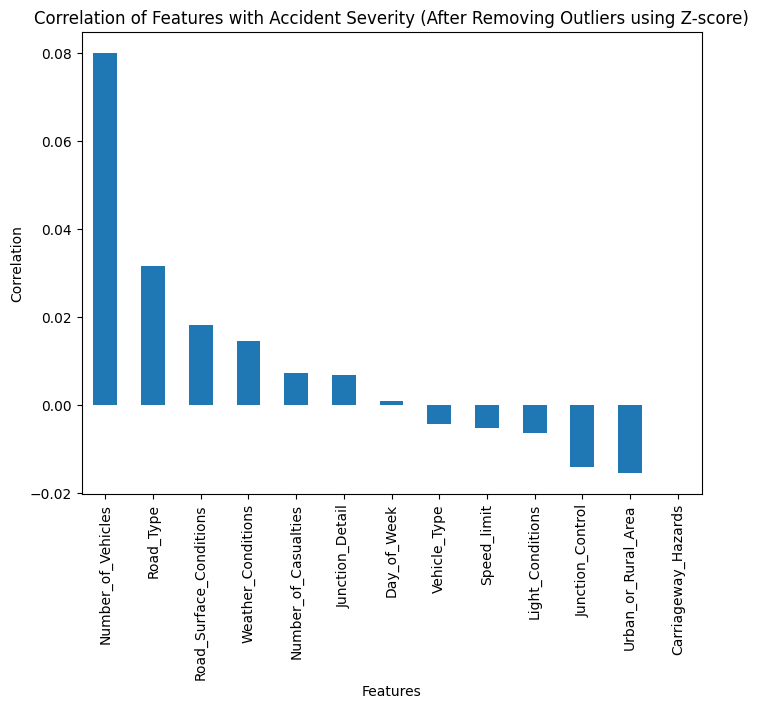


P-value from Chi-squared test for categorical features (After Removing Outliers using Z-score):


In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

correlations_cleaned_Z_score = X_Z_score_outliners_cleaned.corrwith(y_Z_score_outliners_cleaned).sort_values(ascending=False)
print("Correlation of numerical features with Accident Severity (After Removing Outliers using Z-score):")
print(correlations_cleaned_Z_score)

# Plot correlation with the target variable
plt.figure(figsize=(8, 6))
correlations_cleaned_Z_score.plot(kind='bar')
plt.title('Correlation of Features with Accident Severity (After Removing Outliers using Z-score)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

# For categorical features, we can perform a Chi-squared test for independence
print("\nP-value from Chi-squared test for categorical features (After Removing Outliers using Z-score):")
for column in X_Z_score_outliners_cleaned.select_dtypes(include=['object', 'bool', 'category']).columns:
    # Create a cross-tabulation
    contingency_table_cleaned_Z_score = pd.crosstab(X_Z_score_outliners_cleaned[column], y_Z_score_outliners_cleaned)

    # Perform the Chi-squared test
    chi2_Z_score, p_value_Z_score, dof_Z_score, expected_Z_score = chi2_contingency(contingency_table_cleaned_Z_score)

    # Print the p_value
    print(f"{column} (After Removing Outliers using Z-score): p-value = {p_value_Z_score}")

    # Plotting pointplot for categorical features
    plt.figure(figsize=(8, 4))
    sns.pointplot(x=y_Z_score_outliners_cleaned, y=X_Z_score_outliners_cleaned[column].astype('category').cat.codes)
    plt.title(f'Relationship between {column} and Accident Severity (After Removing Outliers using Z-score, p-value = {p_value_Z_score:.4f})')
    plt.xlabel('Accident Severity')
    plt.ylabel('Encoded ' + column)
    plt.show()


In [88]:
# Check if any null values exist in y_cleaned
null_values_in_y = y_Z_score_outliners_cleaned.isnull().any()
print("\nNull values in y_Z_score_outliners_cleaned:")
print(null_values_in_y)

# If you want to know the count of null values
null_counts_in_y = y_Z_score_outliners_cleaned.isnull().sum()
print("\nCount of Null values in y_Z_score_outliners_cleaned:")
print(null_counts_in_y)



Null values in y_Z_score_outliners_cleaned:
False

Count of Null values in y_Z_score_outliners_cleaned:
0


In [89]:
# Check if any null values exist in X_cleaned
null_values_in_X = X_Z_score_outliners_cleaned.isnull().any()
print("Null values in X_Z_score_outliners_cleaned:")
print(null_values_in_X)

# If you want to know the count of null values in each column
null_counts_in_X = X_Z_score_outliners_cleaned.isnull().sum()
print("\nCount of Null values in each column of X_Z_score_outliners_cleaned:")
print(null_counts_in_X)


Null values in X_Z_score_outliners_cleaned:
Day_of_Week                False
Junction_Control           False
Junction_Detail            False
Light_Conditions           False
Carriageway_Hazards        False
Number_of_Casualties       False
Number_of_Vehicles         False
Road_Surface_Conditions    False
Road_Type                  False
Speed_limit                False
Urban_or_Rural_Area        False
Weather_Conditions         False
Vehicle_Type               False
dtype: bool

Count of Null values in each column of X_Z_score_outliners_cleaned:
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64


In [90]:
# Remove features with NaN correlations from the correlation series
correlations_cleaned_Z_score = correlations_cleaned_Z_score.dropna()

# Now print and plot the correlations again
print("Correlation of numerical features with Accident Severity (After Removing Outliers and NaN using Z-score):")
print(correlations_cleaned_Z_score)


Correlation of numerical features with Accident Severity (After Removing Outliers and NaN using Z-score):
Number_of_Vehicles         0.079948
Road_Type                  0.031647
Road_Surface_Conditions    0.018139
Weather_Conditions         0.014592
Number_of_Casualties       0.007308
Junction_Detail            0.006800
Day_of_Week                0.000862
Vehicle_Type              -0.004332
Speed_limit               -0.005226
Light_Conditions          -0.006385
Junction_Control          -0.014059
Urban_or_Rural_Area       -0.015451
dtype: float64


CORRELATION HEAT MAP AFTER Z-SCORE

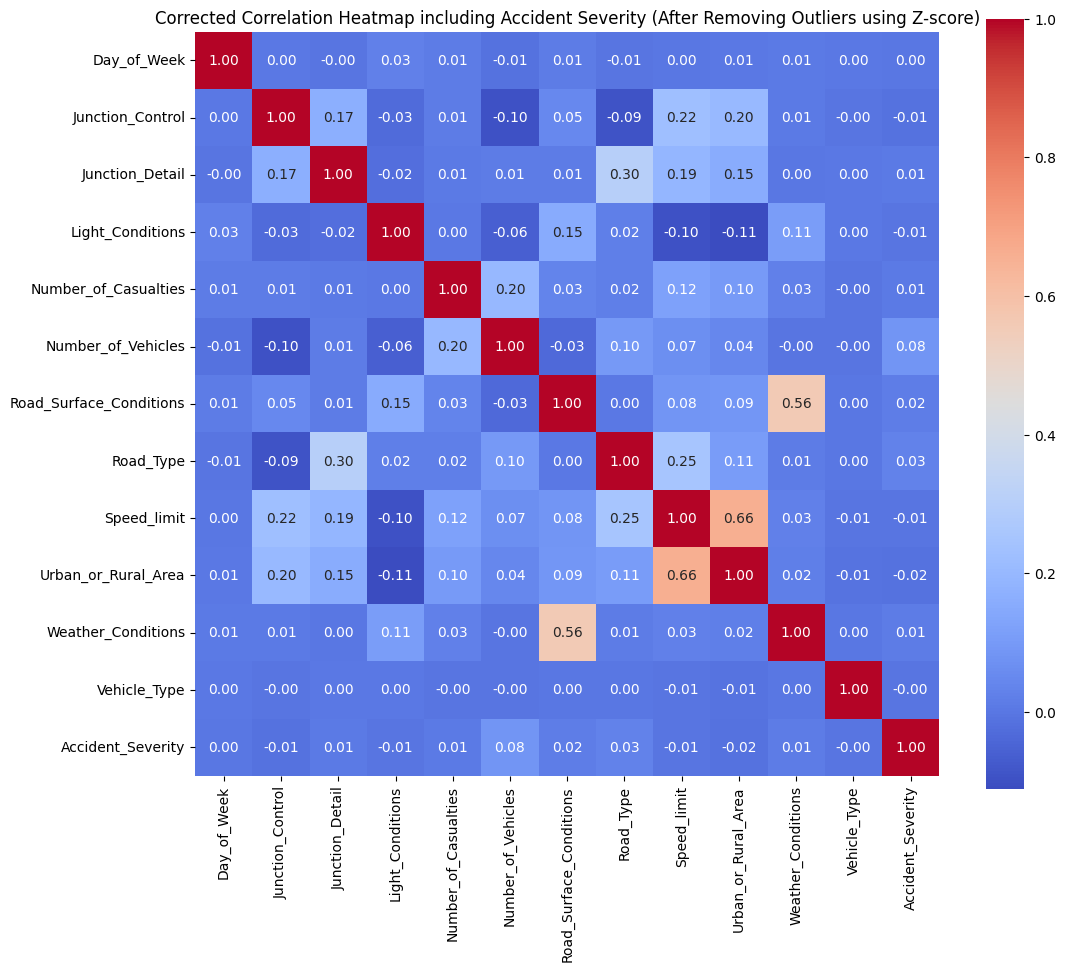

In [91]:

X_with_target_cleaned_Z_score = X_Z_score_outliners_cleaned.copy()
X_with_target_cleaned_Z_score['Accident_Severity'] = y_Z_score_outliners_cleaned

correlation_matrix_cleaned_Z_score = X_with_target_cleaned_Z_score.corr()

# Remove columns and rows with NaN values from the correlation matrix
correlation_matrix_cleaned_Z_score = correlation_matrix_cleaned_Z_score.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_cleaned_Z_score, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Corrected Correlation Heatmap including Accident Severity (After Removing Outliers using Z-score)')
plt.show()



Distribution of Numerical Features in X_with_target_cleaned_Z_score:


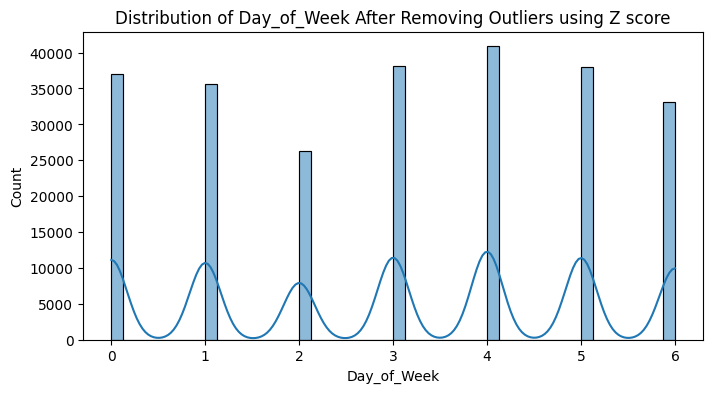

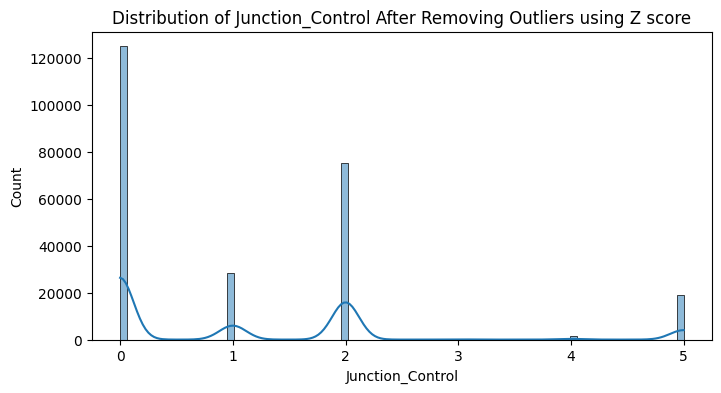

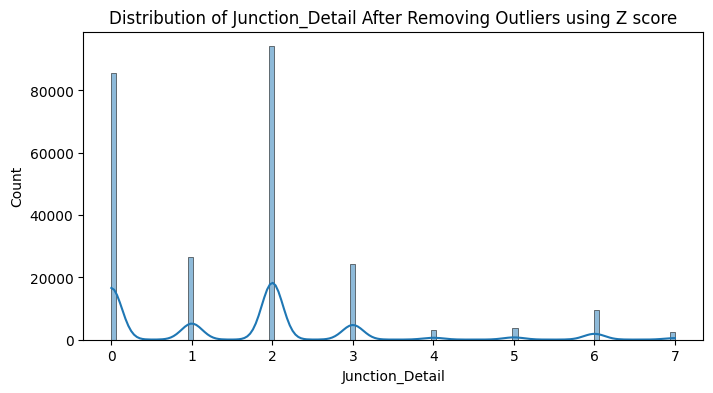

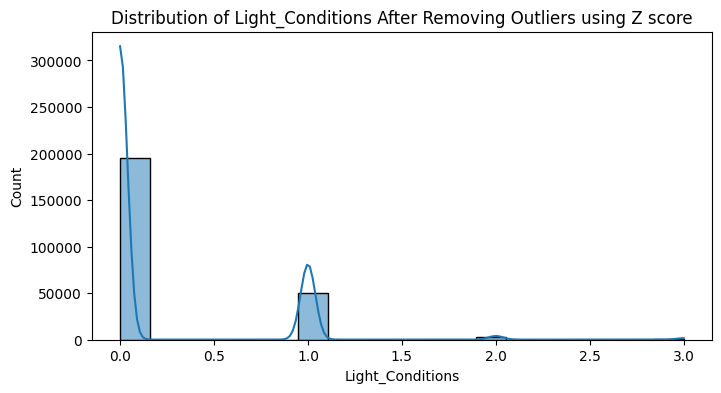

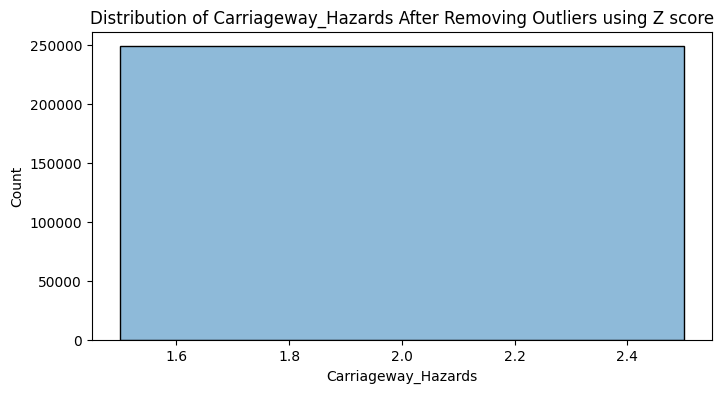

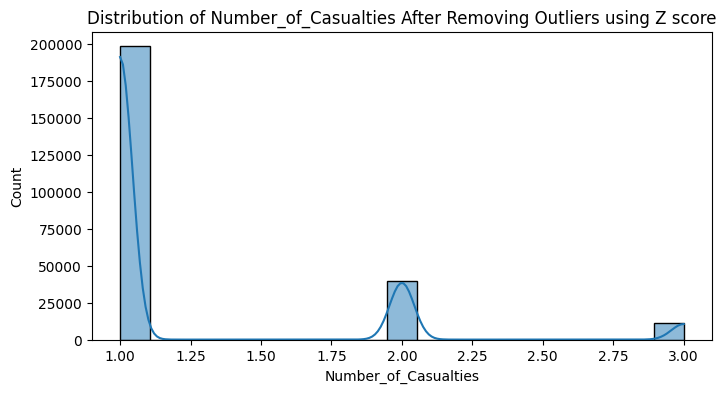

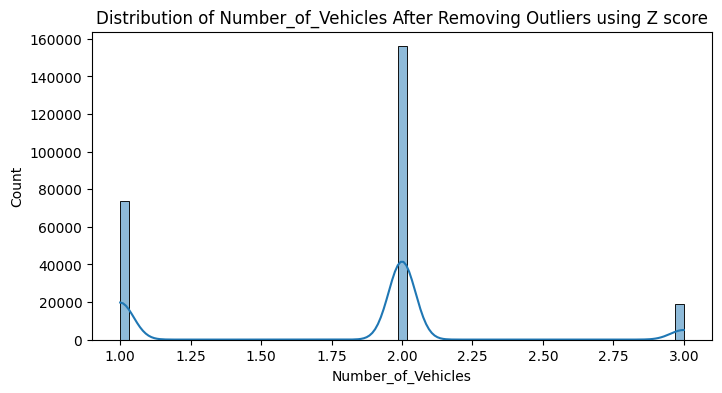

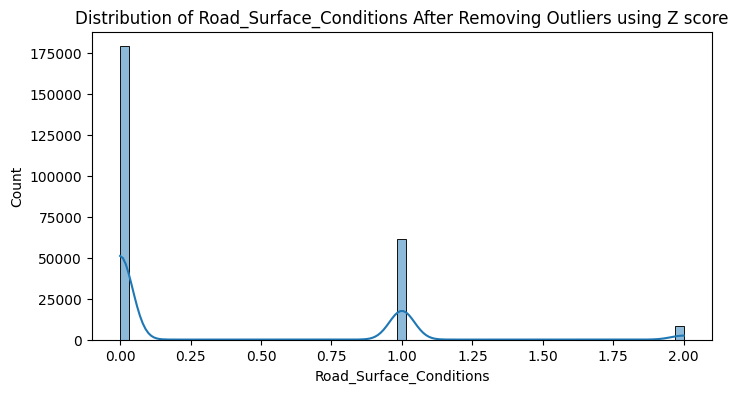

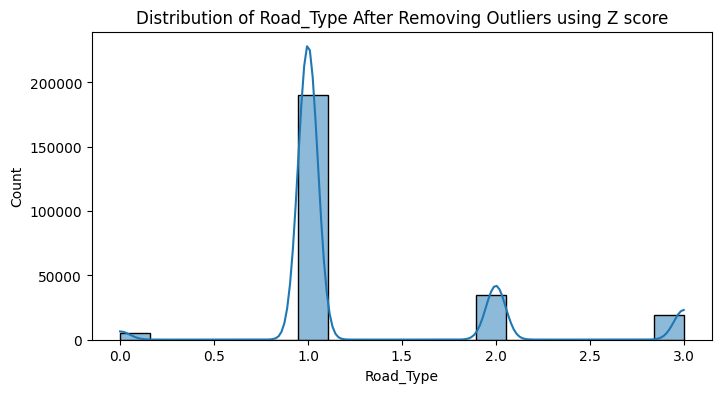

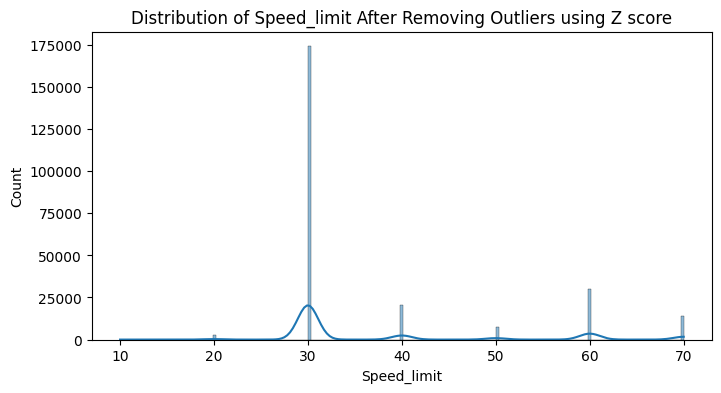

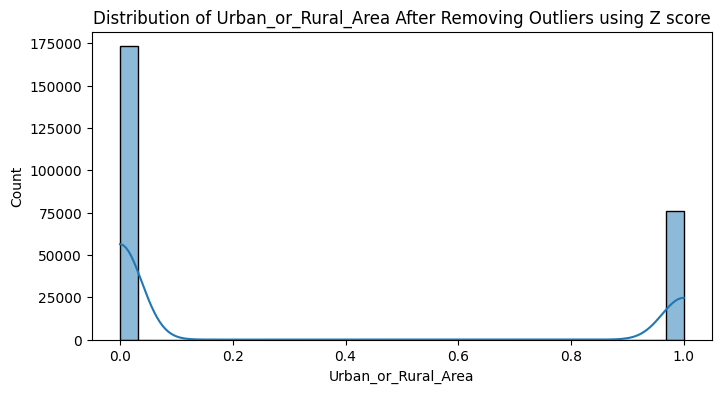

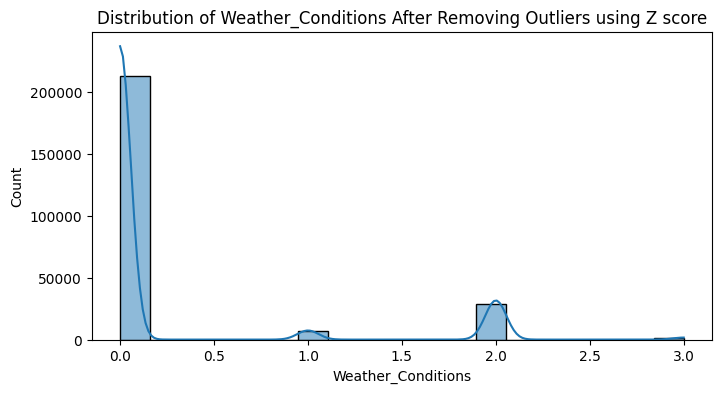

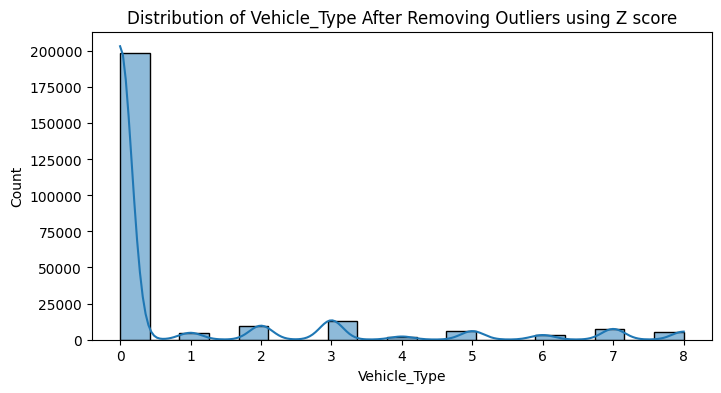

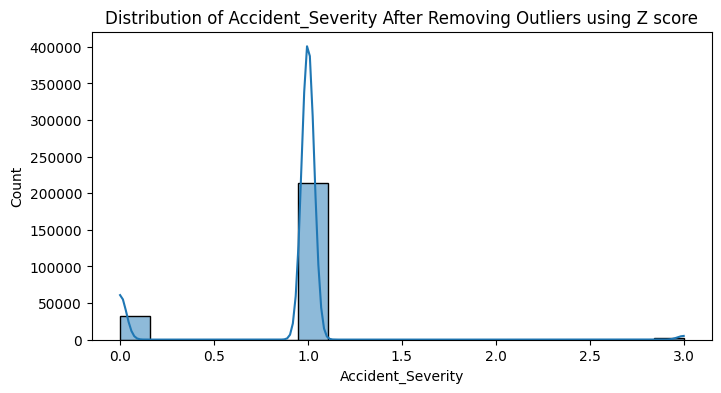

In [92]:
print("\nDistribution of Numerical Features in X_with_target_cleaned_Z_score:")
for column in X_with_target_cleaned_Z_score.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_with_target_cleaned_Z_score[column], kde=True)
    plt.title(f'Distribution of {column} After Removing Outliers using Z score')
    plt.show()



Relationship Between Features and Target Variable After Removing Outliers using Z-score:


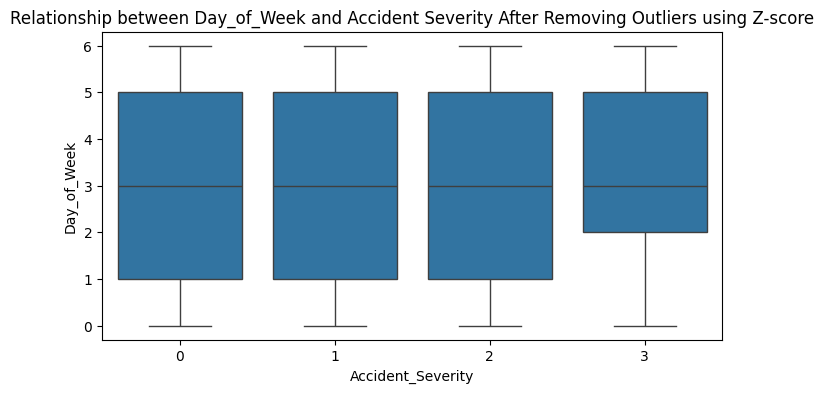

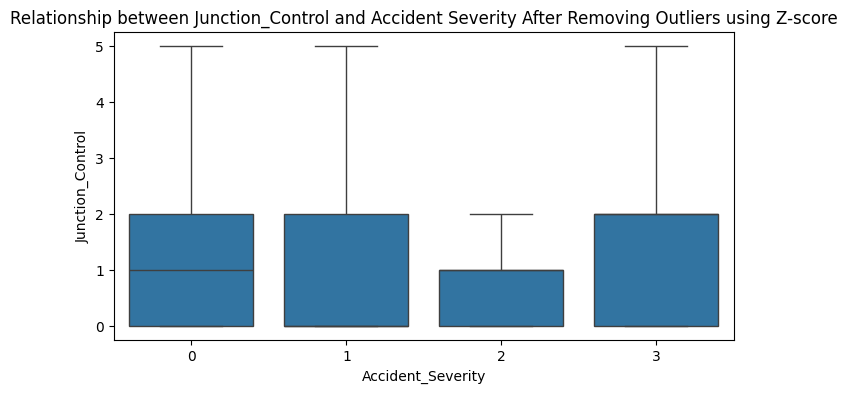

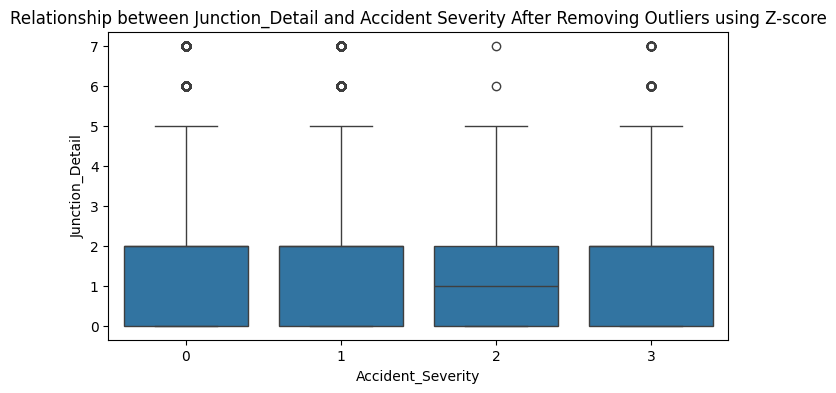

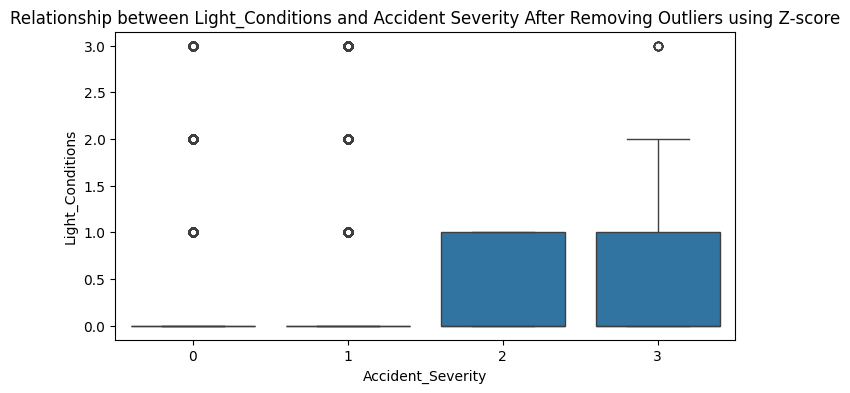

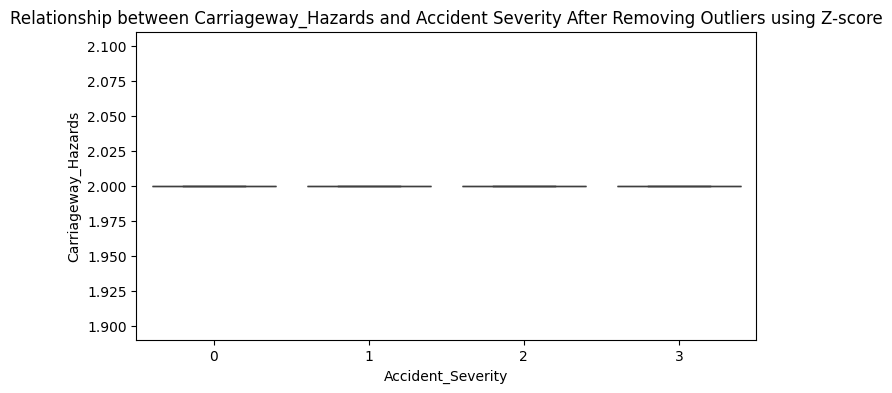

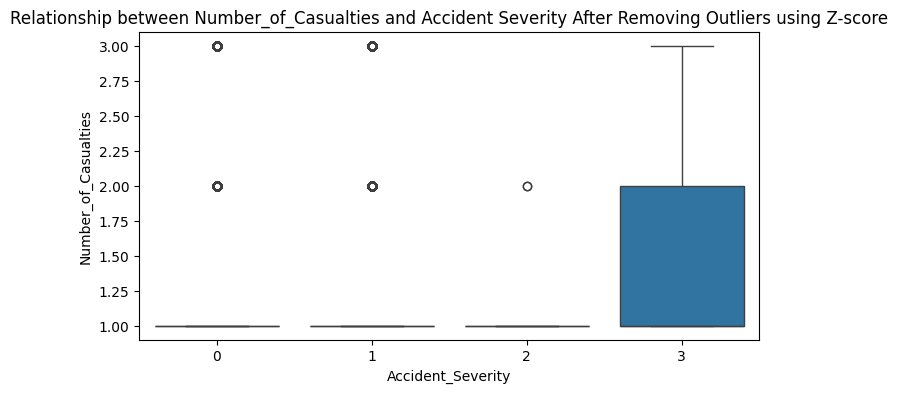

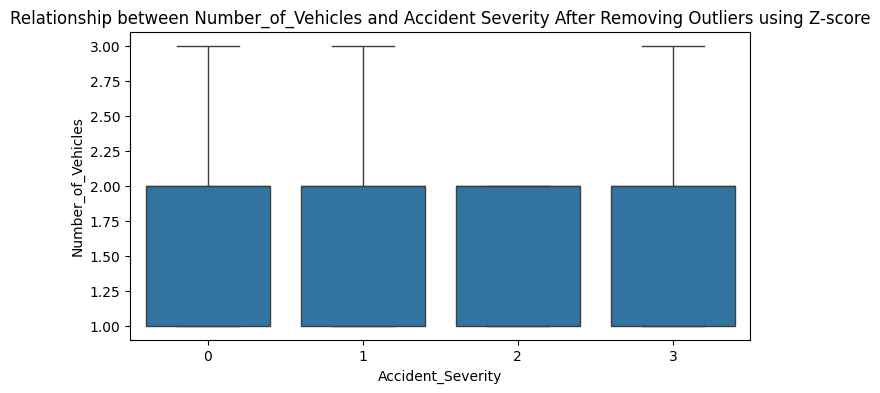

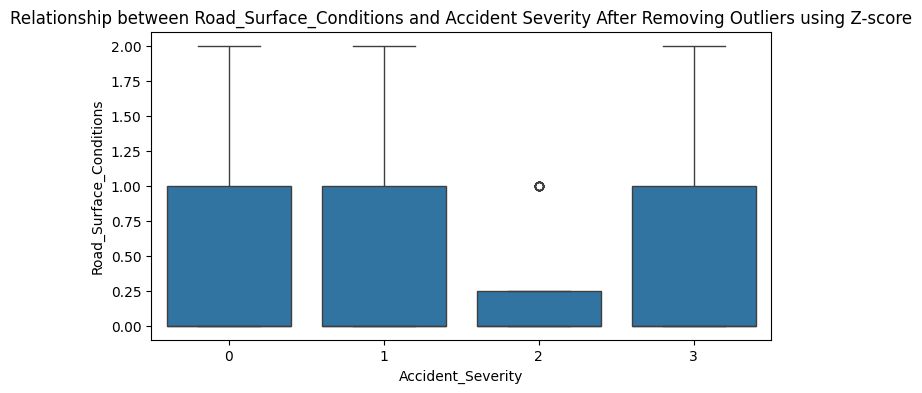

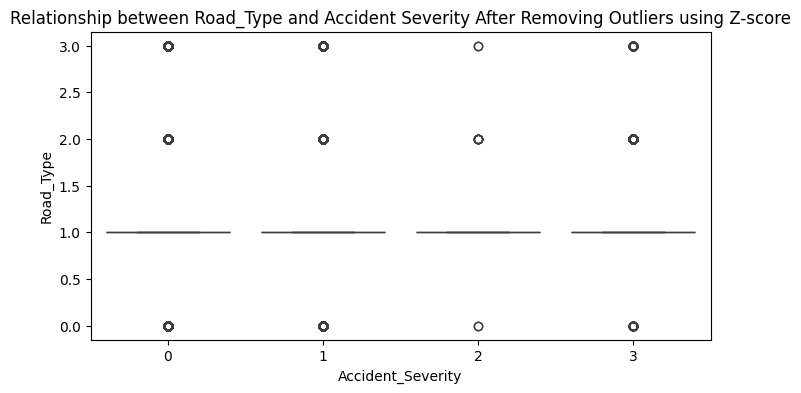

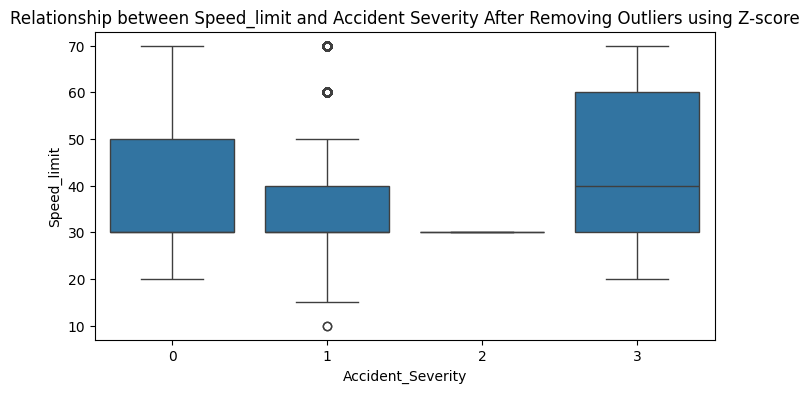

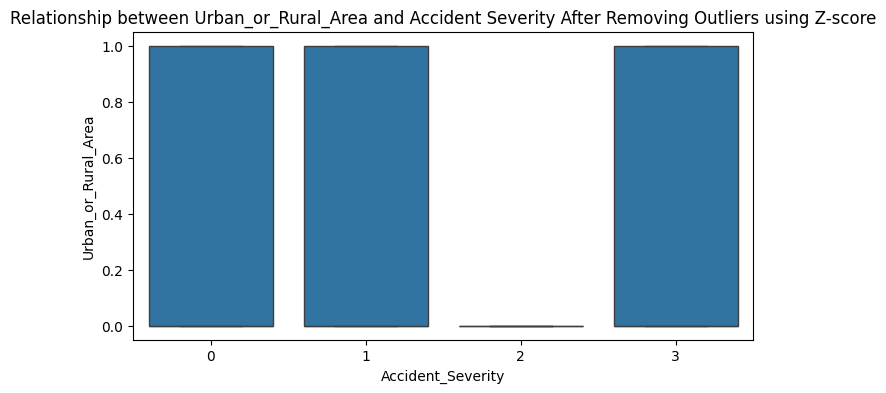

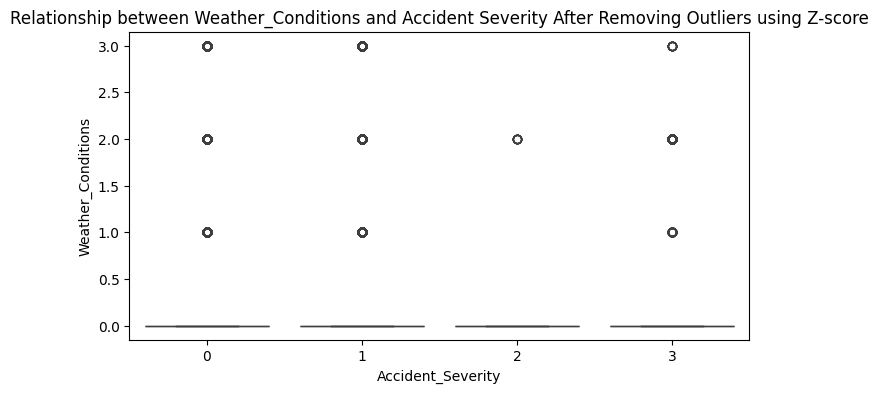

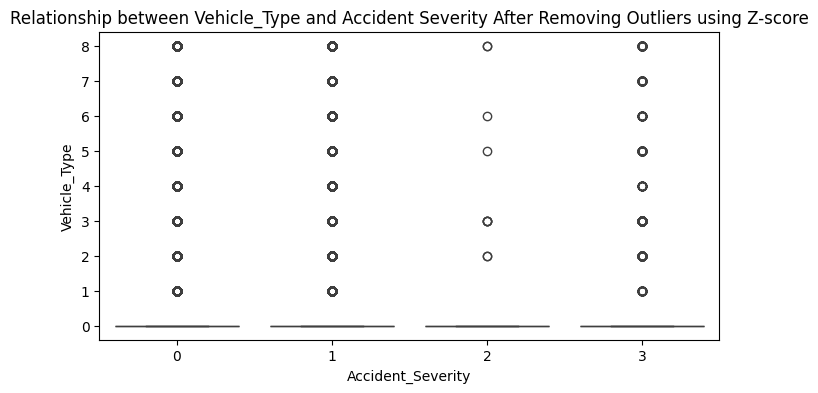

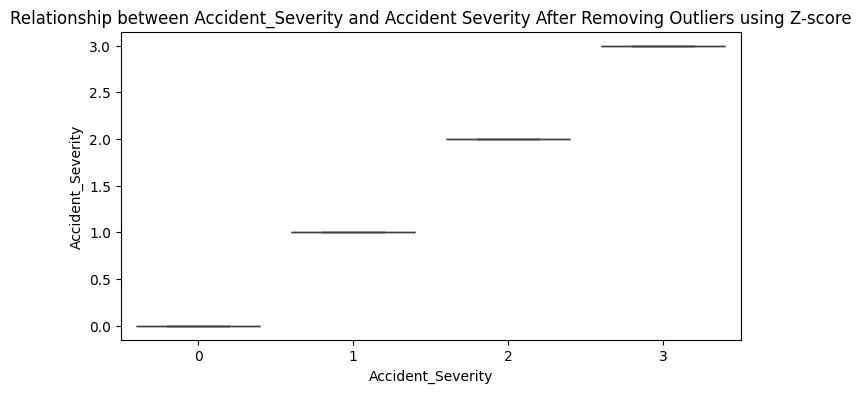

In [93]:
# Analyzing the relationship between each feature in X_with_target_cleaned and the target variable y_cleaned
print("\nRelationship Between Features and Target Variable After Removing Outliers using Z-score:")
for column in X_with_target_cleaned_Z_score.columns:
    if X_with_target_cleaned_Z_score[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=y_Z_score_outliners_cleaned, y=X_with_target_cleaned_Z_score[column])
        plt.title(f'Relationship between {column} and Accident Severity After Removing Outliers using Z-score')
        plt.show()


CLUSTERS AFTER Z-SCORE

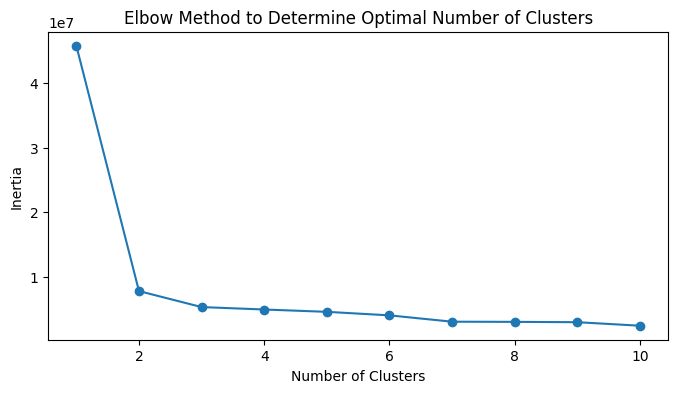

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans_Z_score = KMeans(n_clusters=i, random_state=42)
    kmeans_Z_score.fit(X_Z_score_outliners_cleaned)
    inertia.append(kmeans_Z_score.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

k_optimal = 3
kmeans_Z_score = KMeans(n_clusters=k_optimal, random_state=42)
clusters_Z_score = kmeans_Z_score.fit_predict(X_Z_score_outliners_cleaned)

# Add the cluster labels to your dataset
X_with_clusters_Z_score = X_Z_score_outliners_cleaned.copy()
X_with_clusters_Z_score['Cluster'] = clusters_Z_score


In [95]:
# Check the shape of the cleaned DataFrame
print("Shape of X after removing outliers:", X_Z_score_outliners_cleaned.shape)
print("Shape of y after removing outliers:", y_Z_score_outliners_cleaned.shape)

Shape of X after removing outliers: (249102, 13)
Shape of y after removing outliers: (249102,)


SMOTE- Z-SCORE

In [96]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN


# Prepare the features and target variable
X_Z_score = X_Z_score_outliners_cleaned.drop(['Number_of_Casualties','Junction_Detail','Day_of_Week','Carriageway_Hazards',
                                              'Vehicle_Type','Speed_limit','Light_Conditions','Junction_Control',
                                              'Urban_or_Rural_Area'], axis=1)
y_Z_score = y_Z_score_outliners_cleaned

# Split the dataset into training and testing sets
X_Z_score_train, X_Z_score_test, y_Z_score_train, y_Z_score_test = train_test_split(X_Z_score, y_Z_score, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled_Z_score = scaler.fit_transform(X_Z_score_train)
X_test_scaled_Z_score = scaler.transform(X_Z_score_test)

# Apply SMOTE to the training data
smote_Z_score= SMOTE(random_state=42)
X_train_smote_Z_score, y_train_smote_Z_score = smote_Z_score.fit_resample(X_train_scaled_Z_score, y_Z_score_train)

# Now, X_train_smote and y_train_smote can be used to train a machine learning model
print(X_train_smote_Z_score.shape)
print(X_test_scaled_Z_score.shape)
print(y_train_smote_Z_score.shape)

(685712, 4)
(49821, 4)
(685712,)


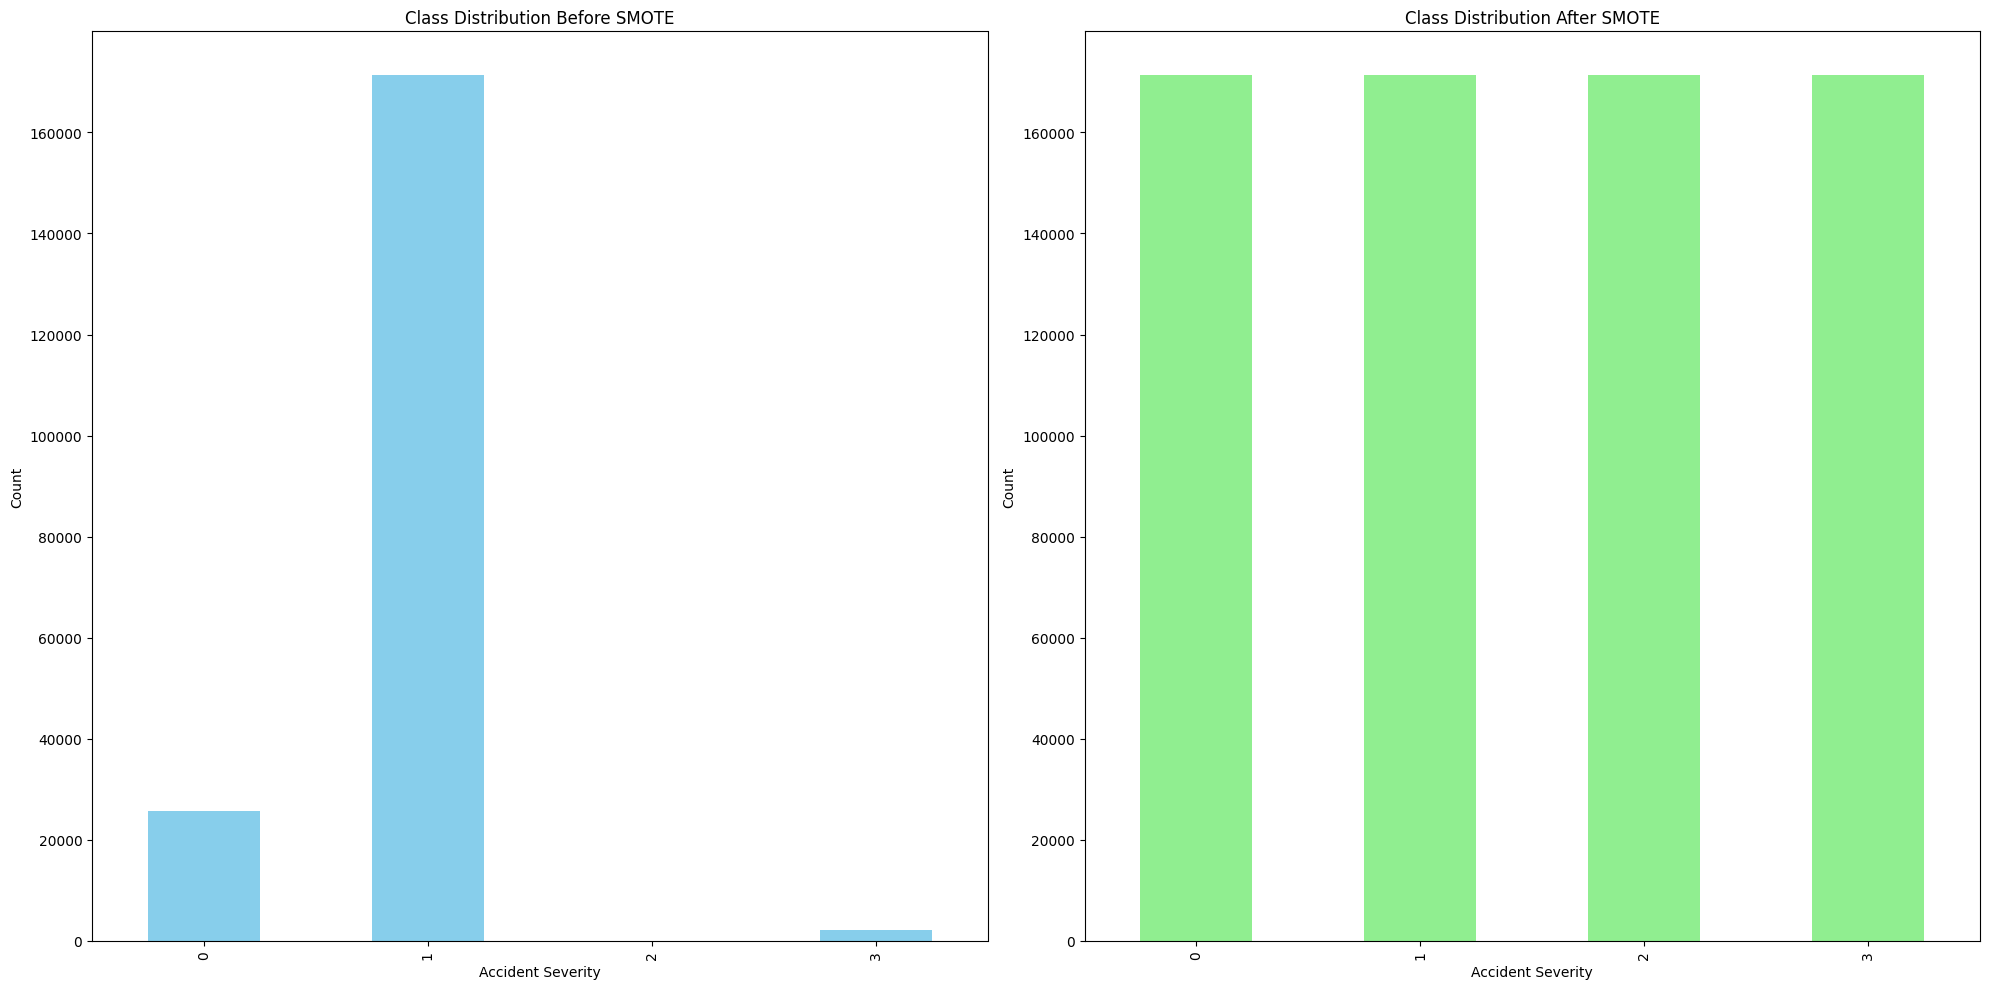

In [97]:
# Plot the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Before SMOTE
y_Z_score_train.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Accident Severity')
axes[0].set_ylabel('Count')

# After SMOTE
y_train_smote_Z_score.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Accident Severity')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

PCA - Z-SCORE

In [98]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# Apply PCA to the SMOTE-balanced training data
pca = PCA()
pca.fit(X_train_smote_Z_score)


PCA()

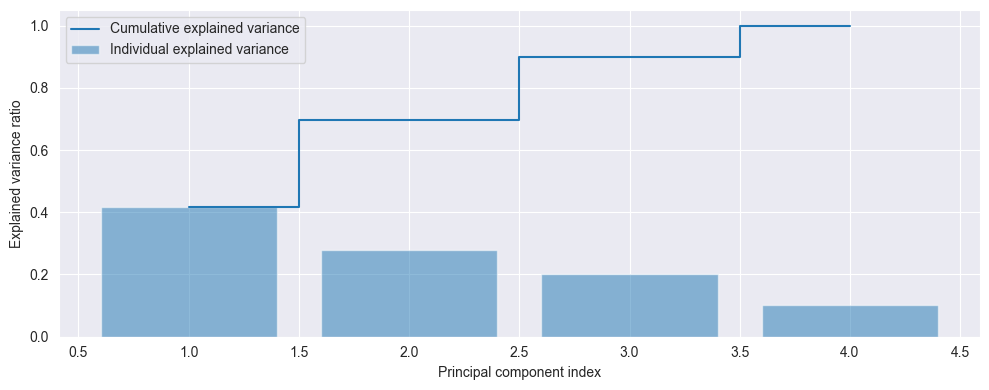

In [99]:
# Calculate and visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Select the number of components based on cumulative explained variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components)
X_train_pca_Z_score = pca.fit_transform(X_train_smote_Z_score)
X_test_pca_Z_score = pca.transform(X_test_scaled_Z_score)


In [100]:
# Print the number of components used
print(f"Number of Principal Components used: {pca.n_components_}")

Number of Principal Components used: 4


In [101]:
# This function identifies the elbow point
def find_elbow_point(cumulative_variance_ratio):
    differences = np.diff(cumulative_variance_ratio)
    elbows = np.where(differences < 0.01)[0]
    return elbows[0] + 1 if len(elbows) > 0 else np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Find and print the elbow point
elbow_point = find_elbow_point(cumulative_variance_ratio)
print(f"The elbow point is at component number: {elbow_point}")

The elbow point is at component number: 4


In [102]:
# Access and print the 4th component
fourth_component = pca.components_[3]
print("Values in the 4th PCA Component:\n", fourth_component)

Values in the 4th PCA Component:
 [ 0.03899668  0.75350174  0.01167956 -0.6561844 ]


In [103]:
# Print the columns in the DataFrames
print("Columns in X_train_pca:", X_train_pca_Z_score.shape)
print("Columns in X_test_pca:", X_test_pca_Z_score.shape)

Columns in X_train_pca: (685712, 4)
Columns in X_test_pca: (49821, 4)


MODELS FOR Z-SCORE

KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

X_train_subset_Z_score = X_train_pca_Z_score[:300000]
y_train_subset_Z_score= y_train_smote_Z_score[:300000]

X_test_subset_Z_score = X_test_pca_Z_score[:100000]
y_test_subset_Z_score = y_Z_score_test[:100000]

knn_model_sub_Z_score = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm='ball_tree',metric='euclidean')

knn_model_sub_Z_score.fit(X_train_subset, y_train_subset)

y_pred_knn_sub_Z_score = knn_model_sub_Z_score.predict(X_test_subset_Z_score)

print("Classification report\n"+classification_report(y_test_subset_Z_score, y_pred_knn_sub_Z_score))

Classification report
              precision    recall  f1-score   support

           0       0.11      0.50      0.19      6420
           1       0.84      0.42      0.56     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.43     49821
   macro avg       0.24      0.23      0.19     49821
weighted avg       0.74      0.43      0.51     49821



XGBOOSTING

In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train_subset_xg = X_train_pca_Z_score[:300000]
y_train_subset_xg = y_train_smote_Z_score[:300000]

X_test_subset_xg = X_test_pca_Z_score[:100000]
y_test_subset_xg = y_Z_score_test[:100000]

# Create an XGBoost model
xgb_model_sub = XGBClassifier()

# Train the model on your training data
xgb_model_sub.fit(X_train_subset_xg, y_train_subset_xg)

# Make predictions on your test data
y_pred_subset_xg = xgb_model_sub.predict(X_test_subset_xg)

# Evaluate the model
print(classification_report(y_test_subset_xg, y_pred_subset_xg))
print(confusion_matrix(y_test_subset_xg, y_pred_subset_xg))


              precision    recall  f1-score   support

           0       0.20      0.42      0.27      6420
           1       0.89      0.75      0.81     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.70     49821
   macro avg       0.27      0.29      0.27     49821
weighted avg       0.79      0.70      0.73     49821

[[ 2684  3736     0     0]
 [10701 32166     0     0]
 [    4     3     0     0]
 [  227   300     0     0]]


RF

In [106]:
from sklearn.ensemble import RandomForestClassifier

# create a model
rf_clf=RandomForestClassifier(max_depth=88,n_estimators=880)

#fit the model
rf_clf.fit(X_train_pca_Z_score,y_train_smote_Z_score)

#predict using test data
y_pred=rf_clf.predict(X_test_pca_Z_score)

#evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_Z_score_test,y_pred))
print(confusion_matrix(y_Z_score_test,y_pred))

              precision    recall  f1-score   support

           0       0.19      0.34      0.25      6420
           1       0.91      0.27      0.42     42867
           2       0.00      0.43      0.00         7
           3       0.02      0.20      0.04       527

    accuracy                           0.28     49821
   macro avg       0.28      0.31      0.18     49821
weighted avg       0.80      0.28      0.39     49821

[[ 2183  1161  2193   883]
 [ 8889 11745 17758  4475]
 [    4     0     3     0]
 [  163    69   187   108]]


In [107]:
from sklearn.ensemble import RandomForestClassifier

#create a model
rf_clf=RandomForestClassifier(max_depth=100,n_estimators=800)

# fit the model
rf_clf.fit(X_train_pca_Z_score,y_train_smote_Z_score)

#predict using test data
y_pred=rf_clf.predict(X_test_pca_Z_score)

#evaluate model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_Z_score_test,y_pred))
print(confusion_matrix(y_Z_score_test,y_pred))

              precision    recall  f1-score   support

           0       0.19      0.34      0.25      6420
           1       0.91      0.27      0.42     42867
           2       0.00      0.43      0.00         7
           3       0.02      0.20      0.04       527

    accuracy                           0.28     49821
   macro avg       0.28      0.31      0.18     49821
weighted avg       0.80      0.28      0.39     49821

[[ 2183  1161  2193   883]
 [ 8889 11745 17758  4475]
 [    4     0     3     0]
 [  163    69   187   108]]


In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create subsets using the first 30,000 samples for training and 10,000 samples for testing
X_train_subset = X_train_pca_Z_score[:30000]
y_train_subset = y_train_smote_Z_score[:30000]
X_test_subset = X_test_pca_Z_score[:10000]
y_test_subset = y_Z_score_test[:10000]

# Create a model
rf_clf = RandomForestClassifier(max_depth=88, n_estimators=880)

# Fit the model on the train subset
rf_clf.fit(X_train_subset, y_train_subset)

# Predict using the test subset
y_pred = rf_clf.predict(X_test_subset)

# Evaluate the model on the test subset
print("Classification Report:")
print(classification_report(y_test_subset, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_subset, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1293
           1       0.86      1.00      0.93      8611
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        95

    accuracy                           0.86     10000
   macro avg       0.22      0.25      0.23     10000
weighted avg       0.74      0.86      0.80     10000

Confusion Matrix:
[[   0 1293    0    0]
 [   1 8610    0    0]
 [   0    1    0    0]
 [   0   95    0    0]]


SVM:

In [109]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Subset of rows for making predictions
X_train_subset_rbf_ovr_hundred = X_train_pca_Z_score[:300000]
y_train_subset_rbf_ovr_hundred = y_train_smote_Z_score[:300000]
X_test_subset_rbf_ovr_hundred = X_test_pca_Z_score[:100000]
y_test_subset_rbf_ovr_hundred = y_Z_score_test[:100000]
# Create an SVM model
svm_model_rbf_ovr_hundred = SVC(kernel='rbf', C=100, gamma = 0.1 , decision_function_shape='ovr')

# Train the model on your training data
svm_model_rbf_ovr_hundred.fit(X_train_subset_rbf_ovr_hundred, y_train_subset_rbf_ovr_hundred)

# Make predictions on your test data
y_pred_rbf_ovr_hundred = svm_model_rbf_ovr_hundred.predict(X_test_subset_rbf_ovr_hundred)

# Evaluate the model
print(classification_report(y_test_subset_rbf_ovr_hundred, y_pred_rbf_ovr_hundred))


              precision    recall  f1-score   support

           0       0.20      0.42      0.27      6420
           1       0.89      0.75      0.81     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.70     49821
   macro avg       0.27      0.29      0.27     49821
weighted avg       0.79      0.70      0.73     49821



In [110]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train_subset_rbf_ovr_thousand = X_train_pca_Z_score[:300000]
y_train_subset_rbf_ovr_thousand = y_train_smote_Z_score[:300000]
X_test_subset_rbf_ovr_thousand = X_test_pca_Z_score[:100000]
y_test_subset_rbf_ovr_thousand = y_Z_score_test[:100000]

# Create an SVM model
svm_model_rbf_ovr_thousand = SVC(kernel='rbf', C=1000, gamma = 0.1 , decision_function_shape='ovr')

# Train the model on your training data
svm_model_rbf_ovr_thousand.fit(X_train_subset_rbf_ovr_thousand, y_train_subset_rbf_ovr_thousand)

# Make predictions on your test data
y_pred_rbf_ovr_thousand = svm_model_rbf_ovr_thousand.predict(X_test_subset_rbf_ovr_thousand)

# Evaluate the model
print(classification_report(y_test_subset_rbf_ovr_thousand, y_pred_rbf_ovr_thousand))

              precision    recall  f1-score   support

           0       0.20      0.42      0.27      6420
           1       0.89      0.75      0.81     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.70     49821
   macro avg       0.27      0.29      0.27     49821
weighted avg       0.79      0.70      0.73     49821



In [111]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X_train_subset_rbf_ovr_ten_thousand = X_train_pca_Z_score[:300000]
y_train_subset_rbf_ovr_ten_thousand = y_train_smote_Z_score[:300000]
X_test_subset_rbf_ovr_ten_thousand = X_test_pca_Z_score[:100000]
y_test_subset_rbf_ovr_ten_thousand = y_Z_score_test[:100000]

svm_model_rbf_ovr_ten_thousand = SVC(kernel='rbf', C=10000, gamma = 0.1 , decision_function_shape='ovr')

# Train the model on your training data
svm_model_rbf_ovr_ten_thousand.fit(X_train_subset_rbf_ovr_ten_thousand, y_train_subset_rbf_ovr_ten_thousand)

# Make predictions on your test data
y_pred_rbf_ovr_ten_thousand = svm_model_rbf_ovr_ten_thousand.predict(X_test_subset_rbf_ovr_ten_thousand)

# Evaluate the model
print(classification_report(y_test_subset_rbf_ovr_ten_thousand, y_pred_rbf_ovr_ten_thousand))

              precision    recall  f1-score   support

           0       0.20      0.42      0.27      6420
           1       0.89      0.75      0.81     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.70     49821
   macro avg       0.27      0.29      0.27     49821
weighted avg       0.79      0.70      0.73     49821



In [112]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train_subset_linear_hundred = X_train_pca_Z_score[:100000]
y_train_subset_linear_hundred = y_train_smote_Z_score[:100000]
X_test_subset_linear_hundred = X_test_pca_Z_score[:100000]
y_test_subset_linear_hundred = y_Z_score_test[:100000]

# Create an SVM model with specified parameters
svm_model_linear_hundred = SVC(kernel='linear', C=100, gamma=0.1)

# Train the model on your subset of training data
svm_model_linear_hundred.fit(X_train_subset_linear_hundred, y_train_subset_linear_hundred)

# Make predictions on your subset of test data
y_pred_subset_linear_hundred = svm_model_linear_hundred.predict(X_test_subset_linear_hundred)


print(classification_report(y_test_subset_linear_hundred, y_pred_subset_linear_hundred))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6420
           1       0.86      1.00      0.92     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.86     49821
   macro avg       0.22      0.25      0.23     49821
weighted avg       0.74      0.86      0.80     49821



MODELS WITHOUT SMOTE

IQR:

KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

# Split the data into training and testing sets
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_cleaned_outliers_iqr, y_cleaned_outliers_iqr, test_size=0.2, random_state=42,)

knn_model_iqr = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm='ball_tree',metric='euclidean')

knn_model_iqr.fit(X_train_iqr, y_train_iqr)

y_pred_knn_iqr = knn_model_iqr.predict(X_test_iqr)

print("Classification report\n"+classification_report(y_test_iqr, y_pred_knn_iqr))

Classification report
              precision    recall  f1-score   support

           0       0.18      0.28      0.22      2699
           1       0.87      0.79      0.83     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.72     19805
   macro avg       0.26      0.27      0.26     19805
weighted avg       0.76      0.72      0.74     19805



XGBOOSTING

In [114]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_cleaned_outliers_iqr, y_cleaned_outliers_iqr, test_size=0.2, random_state=42,)

# Create an XGBoost model (with default parameters as an example)
xgb_model_only_iqr = XGBClassifier()

# Train the model on your training data
xgb_model_only_iqr.fit(X_train_iqr, y_train_iqr)

# Make predictions on your test data
y_pred_iqr = xgb_model_only_iqr.predict(X_test_iqr)

# Evaluate the model
print(classification_report(y_test_iqr, y_pred_iqr))
print(confusion_matrix(y_test_iqr, y_pred_iqr))


              precision    recall  f1-score   support

           0       0.21      0.00      0.00      2699
           1       0.85      1.00      0.92     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.85     19805
   macro avg       0.27      0.25      0.23     19805
weighted avg       0.76      0.85      0.79     19805

[[    5  2694     0     0]
 [   18 16892     0     0]
 [    0     3     0     0]
 [    1   192     0     0]]


RF

In [115]:
# import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_cleaned_outliers_iqr, y_cleaned_outliers_iqr, test_size=0.2, random_state=42,)

# create a model
rf_clf=RandomForestClassifier(max_depth=88,n_estimators=880)

#fit the model
rf_clf.fit(X_train_iqr,y_train_iqr)

#predict using test data
y_pred=rf_clf.predict(X_test_iqr)

#evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_iqr,y_pred))
print(confusion_matrix(y_test_iqr,y_pred))



              precision    recall  f1-score   support

           0       0.20      0.01      0.01      2699
           1       0.85      1.00      0.92     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.85     19805
   macro avg       0.26      0.25      0.23     19805
weighted avg       0.76      0.85      0.79     19805

[[   20  2679     0     0]
 [   80 16826     0     4]
 [    0     3     0     0]
 [    2   191     0     0]]


SVM - IQR - LINEAR, RBF

In [116]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_cleaned_outliers_iqr, y_cleaned_outliers_iqr, test_size=0.2, random_state=42,)

# Initialize the SVM classifier with a linear kernel
svm_classifier_only_iqr = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier_only_iqr.fit(X_train_iqr, y_train_iqr)

# Make predictions on the test data
y_pred_iqr = svm_classifier_only_iqr.predict(X_test_iqr)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_iqr, y_pred_iqr)

# Print the accuracy
print("Accuracy of SVM Classifier with Linear Kernel:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test_iqr, y_pred_iqr)
print("Classification Report:\n", classification_rep)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_iqr, y_pred_iqr)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM Classifier with Linear Kernel: 0.8538247917192628
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2699
           1       0.85      1.00      0.92     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.85     19805
   macro avg       0.21      0.25      0.23     19805
weighted avg       0.73      0.85      0.79     19805

Confusion Matrix:
 [[    0  2699     0     0]
 [    0 16910     0     0]
 [    0     3     0     0]
 [    0   193     0     0]]


In [117]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train_iqr_rbf, X_test_iqr_rbf, y_train_iqr_rbf, y_test_iqr_rbf = train_test_split(X_cleaned_outliers_iqr, y_cleaned_outliers_iqr, test_size=0.2, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier_only_iqr_rbf = SVC(kernel='rbf')

# Train the SVM classifier on the training data
svm_classifier_only_iqr_rbf.fit(X_train_iqr_rbf, y_train_iqr_rbf)

# Make predictions on the test data
y_pred_iqr_rbf = svm_classifier_only_iqr_rbf.predict(X_test_iqr_rbf)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test_iqr_rbf, y_pred_iqr_rbf)

# Print the accuracy
print("Accuracy of SVM Classifier with rbf Kernel:", accuracy)

# Generate a classification report
classification_rep = classification_report(y_test_iqr_rbf, y_pred_iqr_rbf)
print("Classification Report:\n", classification_rep)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_iqr_rbf, y_pred_iqr_rbf)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM Classifier with rbf Kernel: 0.8538247917192628
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2699
           1       0.85      1.00      0.92     16910
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       193

    accuracy                           0.85     19805
   macro avg       0.21      0.25      0.23     19805
weighted avg       0.73      0.85      0.79     19805

Confusion Matrix:
 [[    0  2699     0     0]
 [    0 16910     0     0]
 [    0     3     0     0]
 [    0   193     0     0]]


Z-Score

KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np

X_train_Z_score_knn, X_test_Z_score_knn, y_train_Z_score_knn, y_test_Z_score_knn = train_test_split(X_Z_score_outliners_cleaned, y_Z_score_outliners_cleaned, test_size=0.2, random_state=42)


knn_model_Z_score = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', algorithm='ball_tree',metric='euclidean')

knn_model_Z_score.fit(X_train_Z_score_knn, y_train_Z_score_knn)

y_pred_Z_score_knn = knn_model_Z_score.predict(X_test_Z_score_knn)

# Generate a classification report
classification_rep_Z_score_knn = classification_report(y_test_Z_score_knn, y_pred_Z_score_knn)
print("Classification Report:\n", classification_rep_Z_score_knn)

# Generate a confusion matrix
conf_matrix_Z_score_knn = confusion_matrix(y_test_Z_score_knn, y_pred_Z_score_knn)
print("Confusion Matrix:\n", conf_matrix_Z_score_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.27      0.19      6420
           1       0.87      0.76      0.81     42867
           2       0.00      0.00      0.00         7
           3       0.04      0.00      0.01       527

    accuracy                           0.69     49821
   macro avg       0.26      0.26      0.25     49821
weighted avg       0.77      0.69      0.72     49821

Confusion Matrix:
 [[ 1744  4664     1    11]
 [10040 32786     1    40]
 [    2     5     0     0]
 [  183   342     0     2]]


XGBOOSTING

In [119]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train_Z_score, X_test_Z_score, y_train_Z_score, y_test_Z_score = train_test_split(X_Z_score_outliners_cleaned, y_Z_score_outliners_cleaned, test_size=0.2, random_state=42)

# Create an XGBoost model (with default parameters as an example)
xgb_model_only_Z_score = XGBClassifier()

# Train the model on your training data
xgb_model_only_Z_score.fit(X_train_Z_score, y_train_Z_score)

# Make predictions on your test data
y_pred_Z_score = xgb_model_only_Z_score.predict(X_test_Z_score)

# Evaluate the model
print(classification_report(y_test_Z_score, y_pred_Z_score))
print(confusion_matrix(y_test_Z_score, y_pred_Z_score))

              precision    recall  f1-score   support

           0       0.23      0.00      0.00      6420
           1       0.86      1.00      0.92     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.86     49821
   macro avg       0.27      0.25      0.23     49821
weighted avg       0.77      0.86      0.80     49821

[[    3  6417     0     0]
 [   10 42857     0     0]
 [    0     7     0     0]
 [    0   527     0     0]]


RF

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and testing sets
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
    X_with_clusters_Z_score, y_Z_score_outliners_cleaned, test_size=0.2, random_state=42
)

# Create a RandomForestClassifier with tuned hyperparameters
rf_clf_with_clusters = RandomForestClassifier(max_depth=10, n_estimators=100)

# Train the model on the
rf_clf_with_clusters.fit(X_train_cluster, y_train_cluster)

# Make predictions on the test set
y_pred_with_clusters = rf_clf_with_clusters.predict(X_test_cluster)

# Evaluate the model]
print("Classification Report (After Adding Cluster Labels):")
print(classification_report(y_test_cluster, y_pred_with_clusters))
print("Confusion Matrix (After Adding Cluster Labels):")
print(confusion_matrix(y_test_cluster, y_pred_with_clusters))


Classification Report (After Adding Cluster Labels):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6420
           1       0.86      1.00      0.92     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.86     49821
   macro avg       0.22      0.25      0.23     49821
weighted avg       0.74      0.86      0.80     49821

Confusion Matrix (After Adding Cluster Labels):
[[    0  6420     0     0]
 [    0 42867     0     0]
 [    0     7     0     0]
 [    0   527     0     0]]


SVM

In [121]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train_Z_score_rbf, X_test_Z_score_rbf, y_train_Z_score_rbf, y_test_Z_score_rbf = train_test_split(X_Z_score_outliners_cleaned, y_Z_score_outliners_cleaned, test_size=0.2, random_state=42)

# Initialize the SVM classifier with a rbf kernel
svm_classifier_only_Z_score_rbf = SVC(kernel='rbf')

# Train the SVM classifier on the training data
svm_classifier_only_Z_score_rbf.fit(X_train_Z_score_rbf, y_train_Z_score_rbf)

# Make predictions on the test data
y_pred_Z_score_rbf = svm_classifier_only_Z_score_rbf.predict(X_test_Z_score_rbf)

# Calculate the accuracy of the classifier
accuracy_Z_score_rbf = accuracy_score(y_test_Z_score_rbf, y_pred_Z_score_rbf)

# Print the accuracy
print("Accuracy of SVM Classifier with rbf Kernel:", accuracy_Z_score_rbf)

# Generate a classification report
classification_rep_Z_score_rbf = classification_report(y_test_Z_score_rbf, y_pred_Z_score_rbf)
print("Classification Report:\n", classification_rep_Z_score_rbf)

# Generate a confusion matrix
conf_matrix_Z_score_rbf = confusion_matrix(y_test_Z_score_rbf, y_pred_Z_score_rbf)
print("Confusion Matrix:\n", conf_matrix_Z_score_rbf)



Accuracy of SVM Classifier with rbf Kernel: 0.860420304690793
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6420
           1       0.86      1.00      0.92     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.86     49821
   macro avg       0.22      0.25      0.23     49821
weighted avg       0.74      0.86      0.80     49821

Confusion Matrix:
 [[    0  6420     0     0]
 [    0 42867     0     0]
 [    0     7     0     0]
 [    0   527     0     0]]


In [122]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train_Z_score, X_test_Z_score, y_train_Z_score, y_test_Z_score = train_test_split(X_Z_score_outliners_cleaned, y_Z_score_outliners_cleaned, test_size=0.2, random_state=42)

# Initialize the SVM classifier with a linear kernel
svm_classifier_only_Z_score = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier_only_Z_score.fit(X_train_Z_score, y_train_Z_score)

# Make predictions on the test data
y_pred_Z_score = svm_classifier_only_Z_score.predict(X_test_Z_score)

# Calculate the accuracy of the classifier
accuracy_Z_score = accuracy_score(y_test_Z_score, y_pred_Z_score)

# Print the accuracy
print("Accuracy of SVM Classifier with Linear Kernel:", accuracy_Z_score)

# Generate a classification report
classification_rep = classification_report(y_test_Z_score, y_pred_Z_score)
print("Classification Report:\n", classification_rep)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test_Z_score, y_pred_Z_score)
print("Confusion Matrix:\n", conf_matrix)



Accuracy of SVM Classifier with Linear Kernel: 0.860420304690793
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6420
           1       0.86      1.00      0.92     42867
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00       527

    accuracy                           0.86     49821
   macro avg       0.22      0.25      0.23     49821
weighted avg       0.74      0.86      0.80     49821

Confusion Matrix:
 [[    0  6420     0     0]
 [    0 42867     0     0]
 [    0     7     0     0]
 [    0   527     0     0]]
